작성자: 김종태
## 가.) 인문통계시각화와 R기초 
프로젝트_헬스케어하조 

1. 연구질문에 따라 데이터 정제하기
2. 변수 각각에 대한 설명, 데이터셋 도표/그래프로 보여주기(기술통계)
3. 변수 특성과 관련 통계분석(평균분석, 상관분석)

데이터 정제하기

## 1.) 데이터 전처리 & 정제 

In [ ]:
install.packages("corrplot")
install.packages("reshape2")
install.packages("tidyverse")
install.packages("corrplot")
install.packages("nortest")
install.packages("GGally")
library(nortest) # 5000천이상 일떄 정규성 검정하는 패키지 
library(tidyverse) #ggplot2, dplyr
library(data.table)
library(corrplot)
library(reshape2)
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::

In [ ]:
#원본데이터 불러오기
system("gdown --id 18422CE7Zo_MyzmcuSS4qCRk71oG5pgk3")
DF_health_data <- read.csv("health_data(201804-202103).csv", 
                            header = TRUE, 
                            fileEncoding = "CP949", 
                            encoding="UTF-8")

In [ ]:
DF_HD <- DF_health_data[,c(5,7,8,9,11,12,13,14,16,17,29)] 
names(DF_HD) <- c("AGE","CERT","YEAR","MONTH","GENDER","HEIGHT",
                  "WEIGHT","FAT","LOW_BP","HIGH_BP","BMI")

In [ ]:
DF_HD$CERT <- ifelse(DF_HD$CERT == "1등급", 3, 
              ifelse(DF_HD$CERT == "2등급", 2, 
              ifelse(DF_HD$CERT == "3등급", 1, 0)))
              # 가장 우수한 1등급을 3, 
              # 2등급은 2, 
              # 3등급은 1, 
              # 참가증은 0으로 변환. 
              # 수가 클수록 높은 성적.

In [ ]:

DF_HD <- DF_HD %>% filter((YEAR >= 2019 & YEAR <= 2020) & MONTH == 12)
              # 2019-2020 12월 데이터 추출

In [ ]:
DF_HD <- DF_HD[,-4]  
DF_HD <- transform.data.frame(DF_HD,  
                              CERT = as.factor(CERT),  
                              YEAR = as.factor(YEAR), 
                              GENDER = as.factor(GENDER))

In [ ]:
DF_HD$GENERATION <- ifelse(DF_HD$AGE <= 19, "10", 
                    ifelse(DF_HD$AGE >= 20 & DF_HD$AGE < 30, "20",
                    ifelse(DF_HD$AGE >= 30 & DF_HD$AGE < 40, "30", 
                    ifelse(DF_HD$AGE >= 40 & DF_HD$AGE < 50, "40", 
                    ifelse(DF_HD$AGE >= 50 & DF_HD$AGE < 60, "50", 
                    ifelse(DF_HD$AGE >= 60 & DF_HD$AGE < 70, "60", 
                           "over_70")))))) #연령대 열 추가

In [ ]:
DF_HD$GENERATION <- as.factor(DF_HD$GENERATION) 

In [ ]:
head(DF_HD,3)
           # 나이, 체력측정결과, 년, 성별, 키, 몸무게, 체지방률, 
           # 최저혈압, 최고혈압, BMI, 연령대

,AGE,CERT,YEAR,GENDER,HEIGHT,WEIGHT,FAT,LOW_BP,HIGH_BP,BMI,GENERATION
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,61,0,2019,M,170.5,71.0,22.1,74,122,24.4,60
2,71,2,2019,F,160.0,61.5,33.8,70,130,24.0,over_70
3,71,1,2019,F,150.5,50.2,30.5,76,152,22.2,over_70


# 2.) 이상치 제거 

In [ ]:
# 이상치 제거 

138.6
159.5
167.0
173.7
194.5


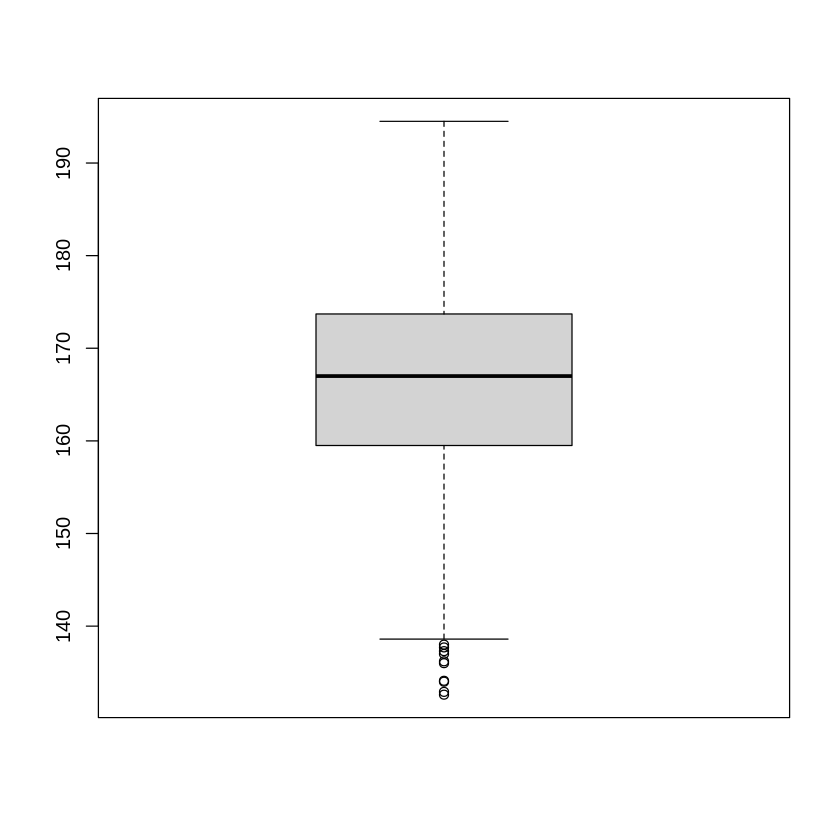

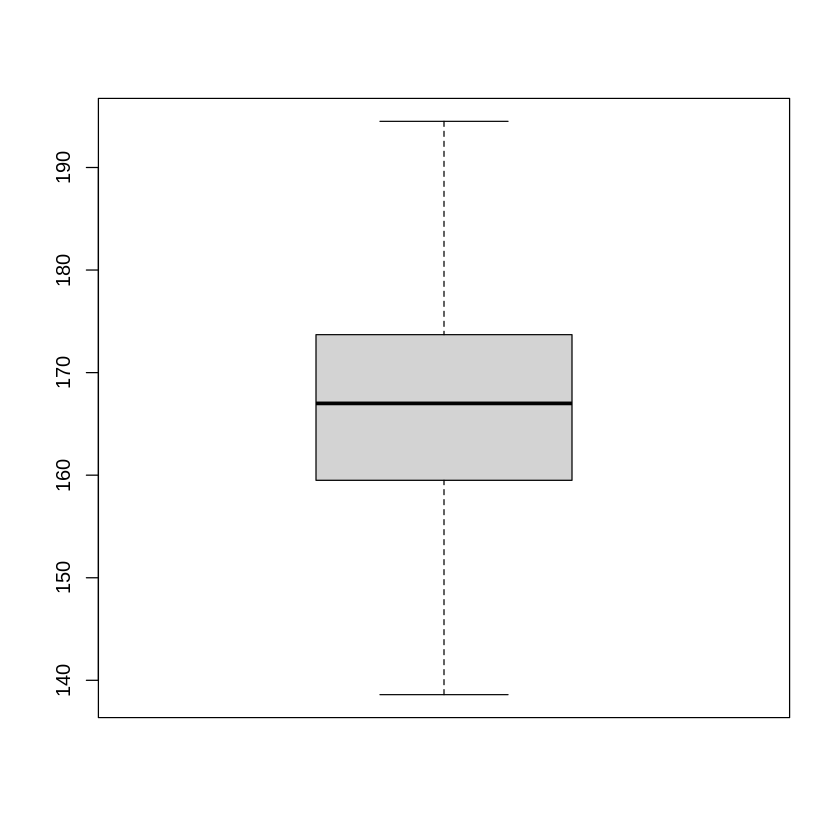

In [ ]:
# HEIGHT
boxplot(DF_HD$HEIGHT)$stats
DF_HD$HEIGHT <- ifelse(DF_HD$HEIGHT < 138.6 | DF_HD$HEIGHT > 194.5, 
                       NA, DF_HD$HEIGHT)
boxplot(DF_HD$HEIGHT) 
# 138.6보다 작은 것, 194.5 보다 높은 것 -> 이상치! 

30.50
56.80
65.30
74.60
101.24


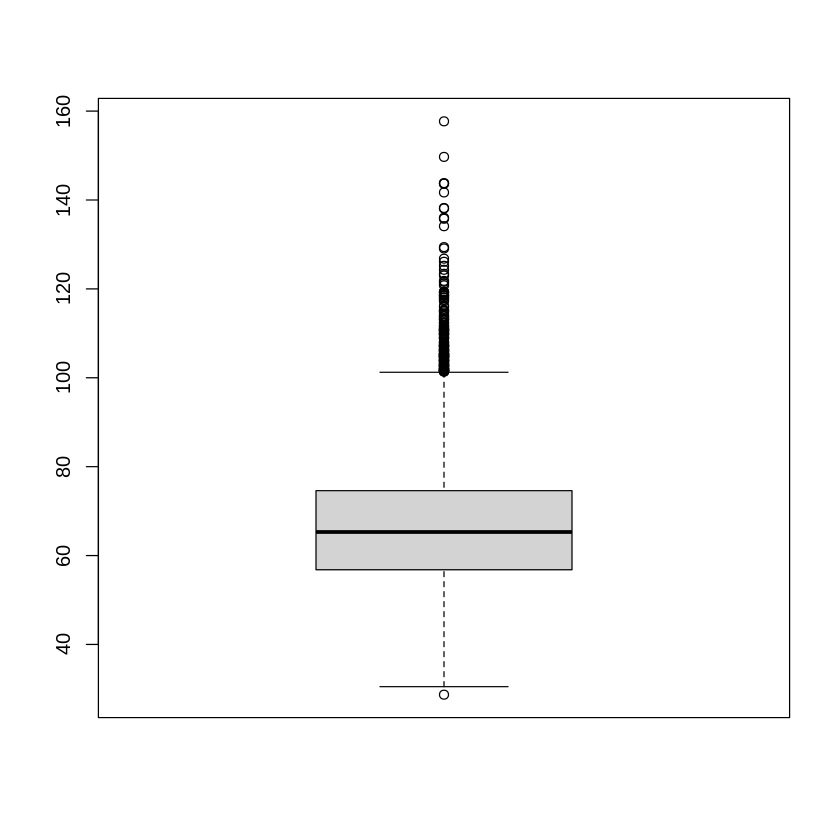

30.50
56.69
65.10
74.20
100.46


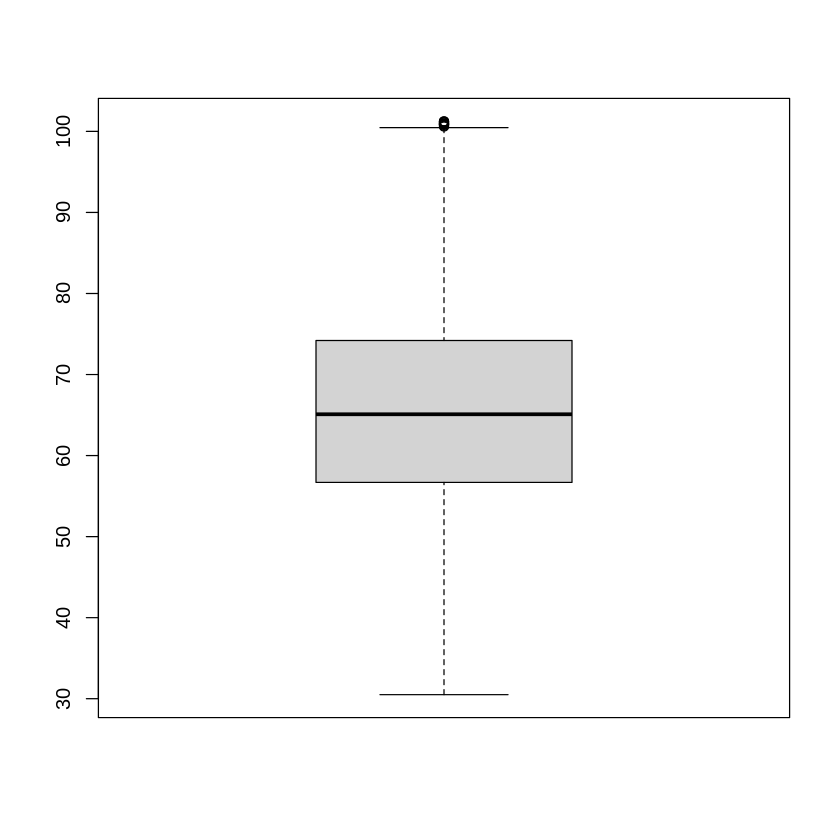

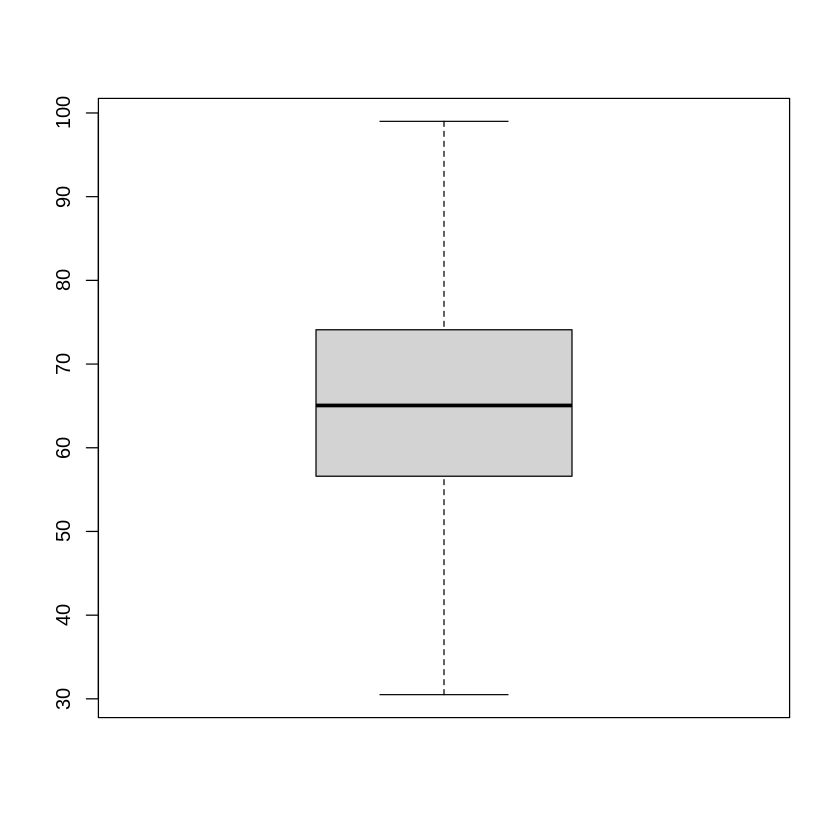

In [ ]:
# WEIGHT
boxplot(DF_HD$WEIGHT)$stats
DF_HD$WEIGHT <- ifelse(DF_HD$WEIGHT < 30.50 | DF_HD$WEIGHT > 101.24,
                       NA, DF_HD$WEIGHT)
boxplot(DF_HD$WEIGHT)
boxplot(DF_HD$WEIGHT)$stats

DF_HD$WEIGHT <- ifelse(DF_HD$WEIGHT < 30.50 | DF_HD$WEIGHT > 99, 
                       NA, DF_HD$WEIGHT)
boxplot(DF_HD$WEIGHT)

14.7
21.4
23.6
25.9
32.6


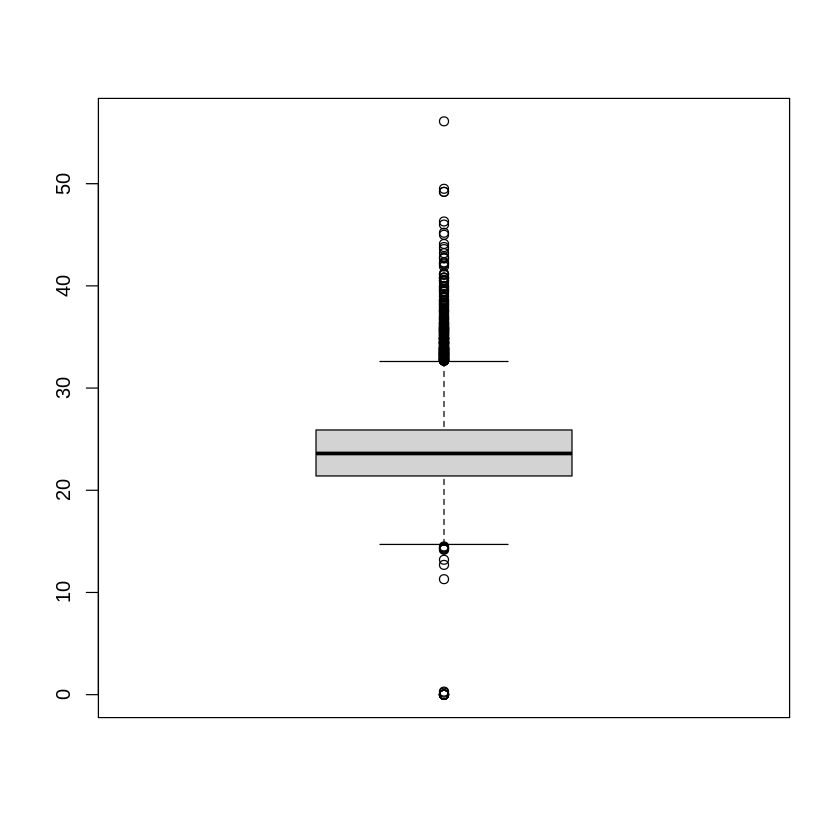

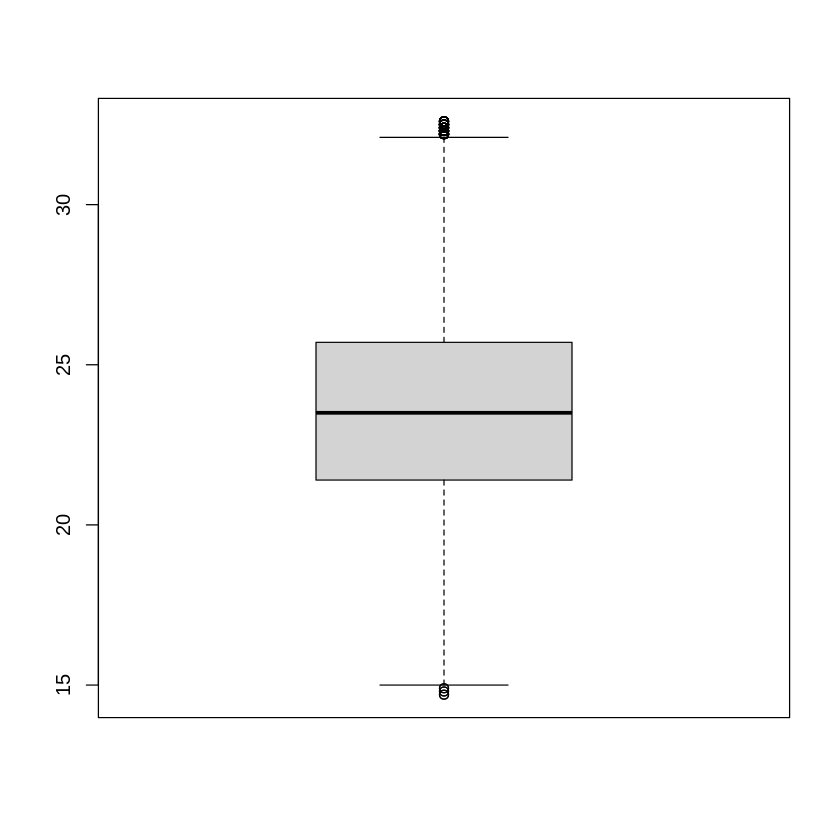

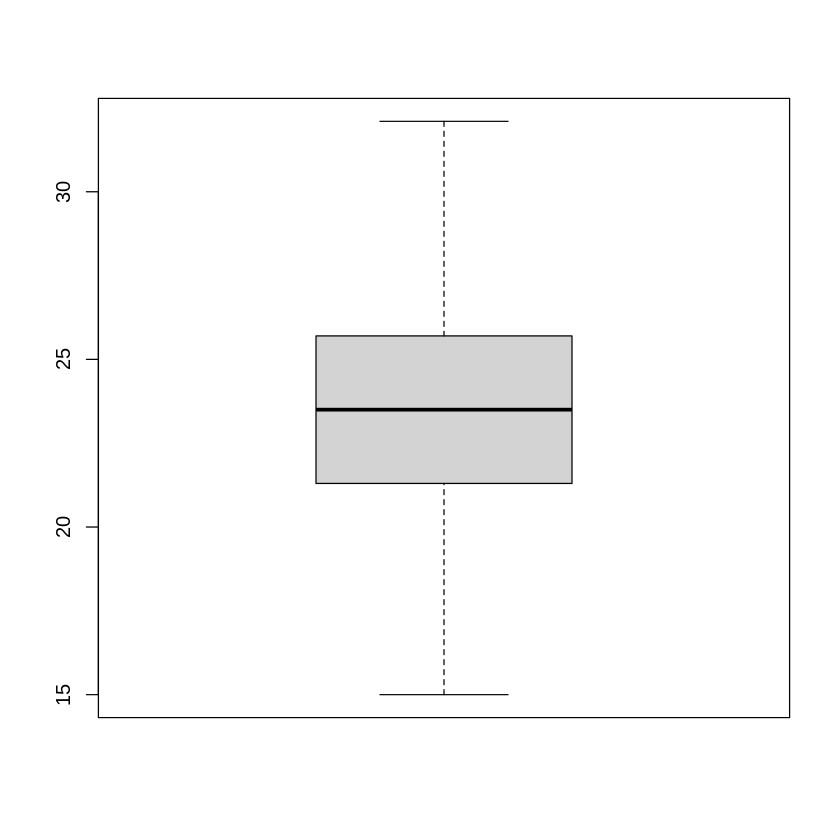

In [ ]:
# BMI
boxplot(DF_HD$BMI)$stats
DF_HD$BMI <- ifelse(DF_HD$BMI < 14.7 | DF_HD$BMI > 32.6, 
                    NA, DF_HD$BMI)

boxplot(DF_HD$BMI)
DF_HD$BMI <- ifelse(DF_HD$BMI < 15.0 | DF_HD$BMI > 32.1, 
                    NA, DF_HD$BMI)
boxplot(DF_HD$BMI)

88
119
128
140
171


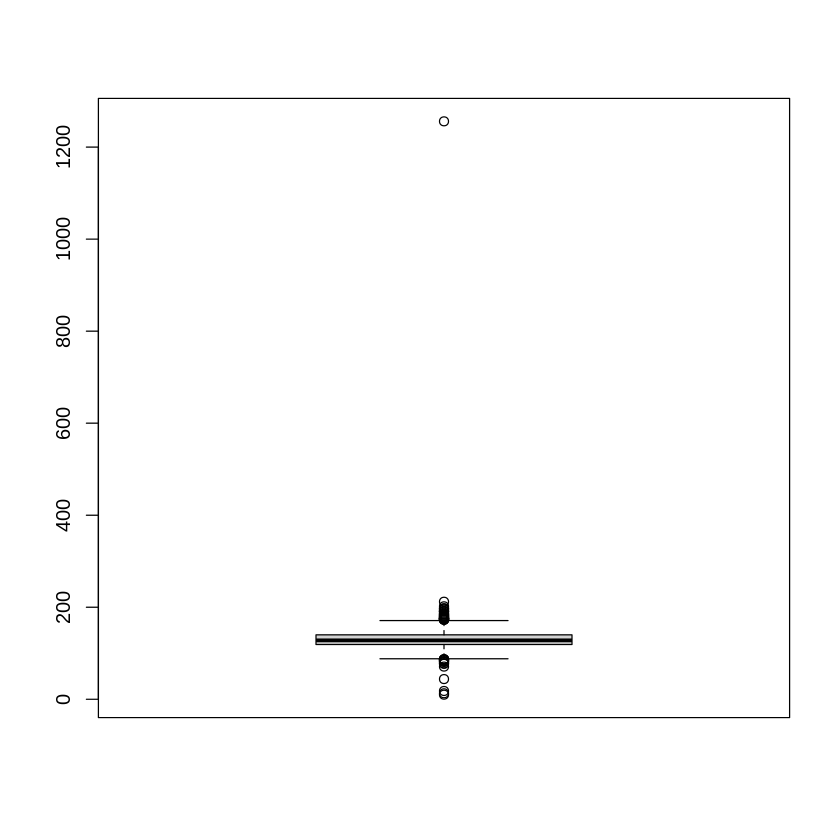

90
119
128
139
168


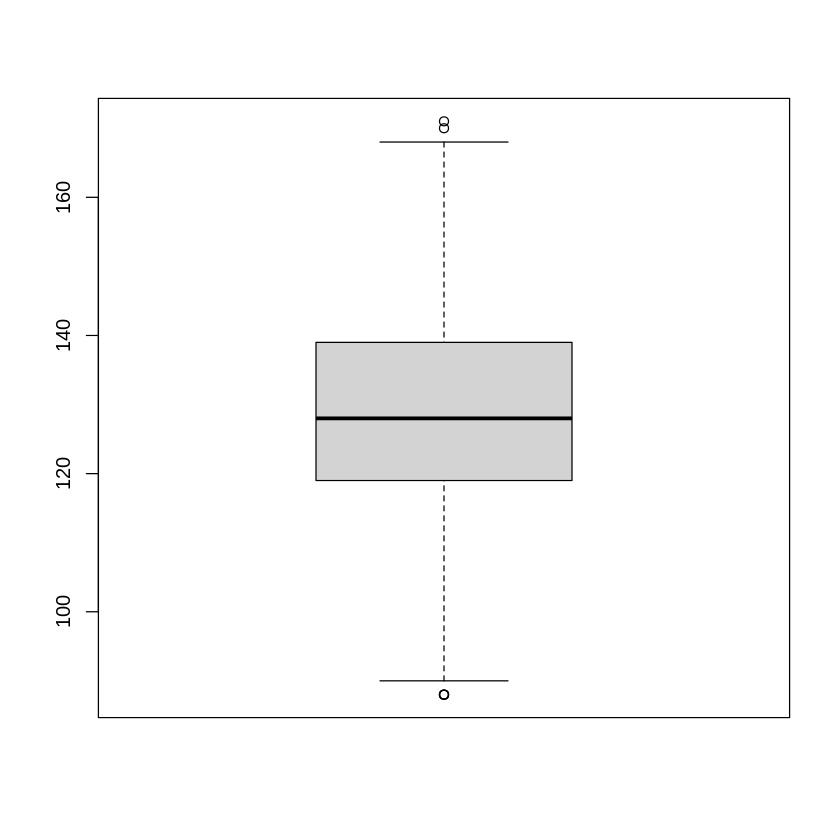

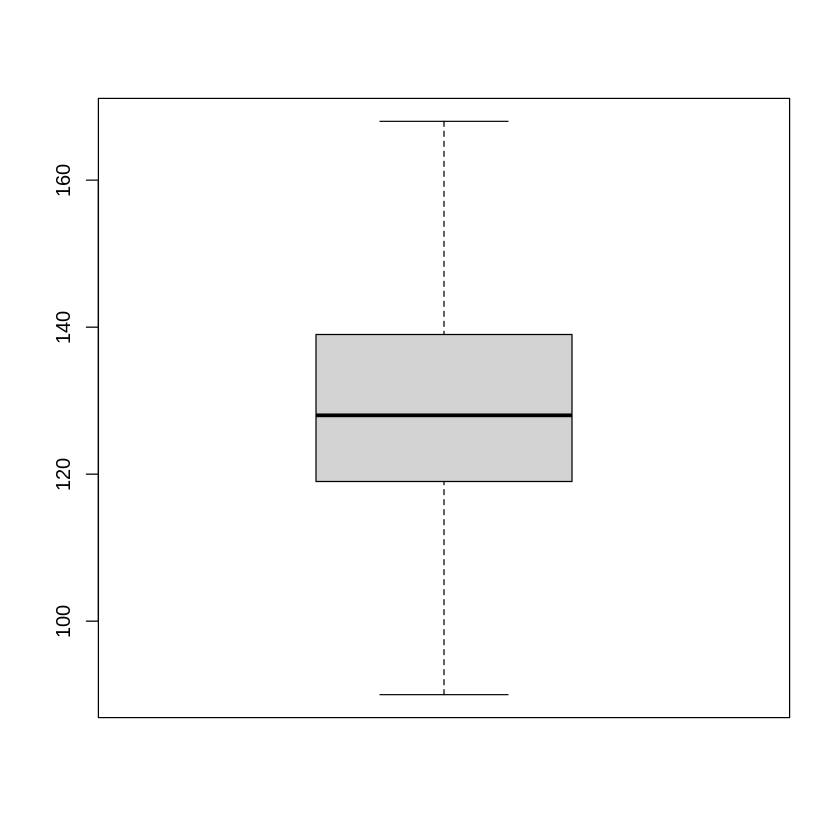

In [ ]:
#HIGH_BP
boxplot(DF_HD$HIGH_BP)$stats
DF_HD$HIGH_BP <- ifelse(DF_HD$HIGH_BP < 88 | DF_HD$HIGH_BP > 171, 
                        NA, DF_HD$HIGH_BP)

boxplot(DF_HD$HIGH_BP)$stats
DF_HD$HIGH_BP <- ifelse(DF_HD$HIGH_BP < 90 | DF_HD$HIGH_BP > 168, 
                        NA, DF_HD$HIGH_BP)
boxplot(DF_HD$HIGH_BP)

50
71
78
85
106


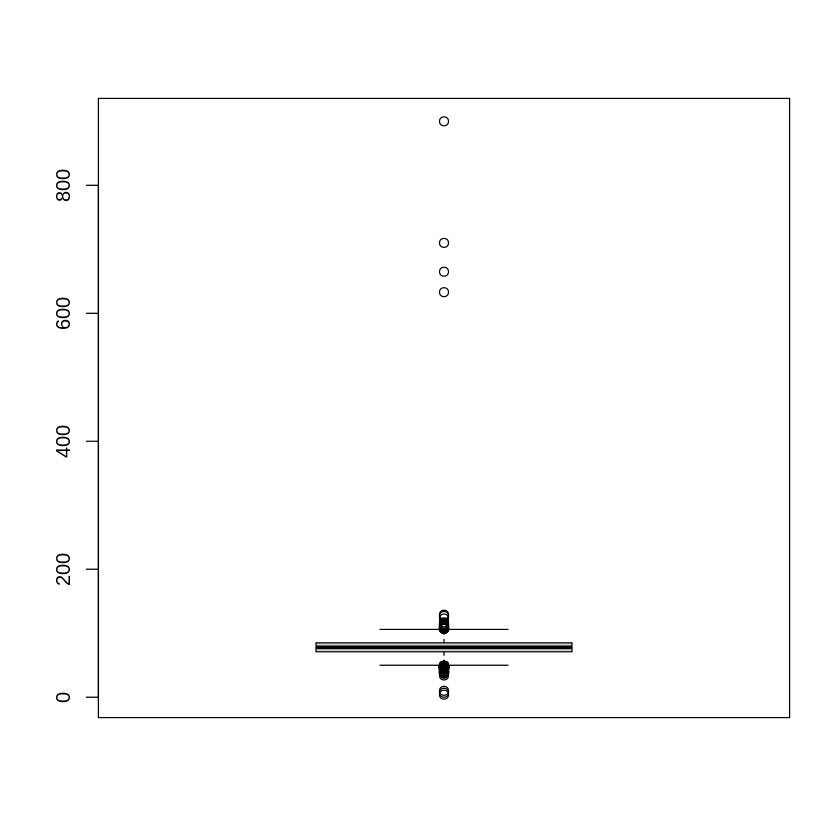

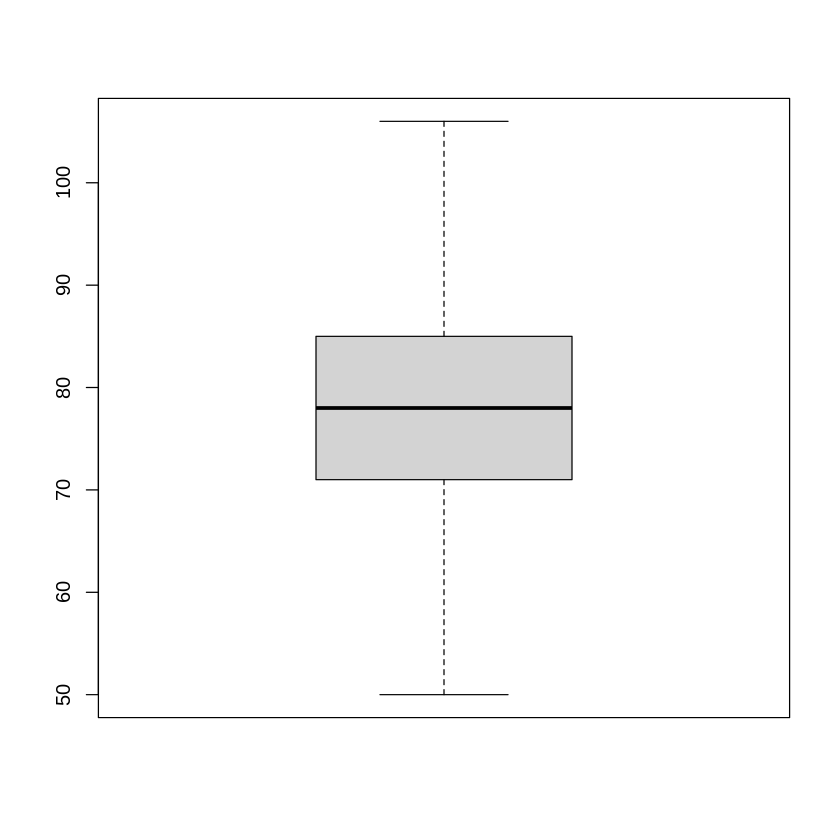

In [ ]:
#LOW_BP
boxplot(DF_HD$LOW_BP)$stats

DF_HD$LOW_BP <- ifelse(DF_HD$LOW_BP < 50 | DF_HD$LOW_BP > 106, NA, 
                       DF_HD$LOW_BP)
boxplot(DF_HD$LOW_BP)

결측값 제거 방법 2가지(정의정, 김종태) 

In [ ]:
# 결측값 제거 (정의정 방식)
# 방법 1
table(is.na(DF_HD)) #결측값인 데이터 빈도수

DF_HD <- na.omit(DF_HD) #결측값이 하나라도 있는 행 제거
head(DF_HD,3)


 FALSE   TRUE 
173216    936 

,AGE,CERT,YEAR,GENDER,HEIGHT,WEIGHT,FAT,LOW_BP,HIGH_BP,BMI,GENERATION
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,61,0,2019,M,170.5,71.0,22.1,74,122,24.4,60
2,71,2,2019,F,160.0,61.5,33.8,70,130,24.0,over_70
3,71,1,2019,F,150.5,50.2,30.5,76,152,22.2,over_70


In [ ]:
# 결측값 제거(김종태 방식)
# 방법 2 
DF_HD_1 <- DF_HD %>% # 덮어씌우는 과정 
  filter(!is.na(HIGH_BP)) # !is.na 함수 

DF_HD_1 <- DF_HD_1 %>% 
  filter(!is.na(FAT))

DF_HD_1 <- DF_HD_1 %>% 
  filter(!is.na(LOW_BP))

DF_HD_1 <- DF_HD_1 %>% 
  filter(!is.na(BMI))

DF_HD_1 <- DF_HD_1 %>% 
  filter(!is.na(WEIGHT))

DF_HD_1 <- DF_HD_1%>% 
  filter(!is.na(HEIGHT))

In [ ]:
# 이상치로 만든 결측치를 제거
# 방법1, 방법 2가 일치하는지 확인 
dim(DF_HD)
dim(DF_HD_1)

[1] 15158    11

[1] 15158    11

# 3-0.) 기술통계 전체 확인 보여주기

In [ ]:
summary(DF_HD)

      AGE       CERT       YEAR       GENDER       HEIGHT          WEIGHT     
 Min.   :13.0   0:8600   2019:12664   F:6488   Min.   :138.6   Min.   :31.90  
 1st Qu.:19.0   1:3106   2020: 2494   M:8670   1st Qu.:159.5   1st Qu.:56.60  
 Median :25.0   2:2284                         Median :166.9   Median :64.90  
 Mean   :35.3   3:1168                         Mean   :166.5   Mean   :65.57  
 3rd Qu.:53.0                                  3rd Qu.:173.6   3rd Qu.:73.80  
 Max.   :91.0                                  Max.   :194.5   Max.   :99.00  
                                                                              
      FAT             LOW_BP          HIGH_BP           BMI       
 Min.   :  2.90   Min.   : 50.00   Min.   : 90.0   Min.   :15.00  
 1st Qu.: 19.60   1st Qu.: 71.00   1st Qu.:119.0   1st Qu.:21.40  
 Median : 25.90   Median : 78.00   Median :128.0   Median :23.50  
 Mean   : 26.08   Mean   : 77.82   Mean   :129.1   Mean   :23.56  
 3rd Qu.: 32.30   3rd Qu.: 85.00 

In [ ]:
DF_HD %>% # YEAR
  group_by(YEAR) %>%
  summarise(mean_HEIGHT = mean(HEIGHT), 
            mean_WEIGHT = mean(WEIGHT),
            mean_BMI = mean(BMI),
            mean_LOW_BP = mean(LOW_BP),
            mean_HIGH_BP = mean(HIGH_BP),
            mean_FAT = mean(FAT))

YEAR,mean_HEIGHT,mean_WEIGHT,mean_BMI,mean_LOW_BP,mean_HIGH_BP,mean_FAT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,166.4106,65.41518,23.52324,77.81670,129.1471,25.91080
2020,166.6674,66.35781,23.77674,77.81167,128.7401,26.93721


In [ ]:
DF_HD %>% # GENERATION  
  group_by(GENERATION) %>%
  summarise(mean_HEIGHT = mean(HEIGHT), 
            mean_WEIGHT = mean(WEIGHT),
            mean_BMI = mean(BMI),
            mean_LOW_BP = mean(LOW_BP),
            mean_HIGH_BP = mean(HIGH_BP),
            mean_FAT = mean(FAT))

GENERATION,mean_HEIGHT,mean_WEIGHT,mean_BMI,mean_LOW_BP,mean_HIGH_BP,mean_FAT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,167.6418,63.79568,22.58844,75.71411,124.5854,24.84632
20,170.7314,68.72880,23.46630,77.57872,127.7410,23.02293
30,169.8388,69.88603,24.07905,80.43207,129.5922,25.06375
40,164.9945,65.87830,24.07981,81.61514,130.2566,27.97963
50,162.0210,63.68977,24.17330,80.51043,132.2956,29.56805
60,160.8853,63.48676,24.44576,79.37628,135.4806,29.66291
over_70,156.6760,60.11419,24.43806,75.67209,135.2775,32.65038


In [ ]:
DF_HD %>% # GENDER 
  group_by(GENDER) %>%
  summarise(mean_HEIGHT = mean(HEIGHT), 
            mean_WEIGHT = mean(WEIGHT),
            mean_BMI = mean(BMI),
            mean_LOW_BP = mean(LOW_BP),
            mean_HIGH_BP = mean(HIGH_BP),
            mean_FAT = mean(FAT))

GENDER,mean_HEIGHT,mean_WEIGHT,mean_BMI,mean_LOW_BP,mean_HIGH_BP,mean_FAT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,158.7280,57.75190,22.93335,76.37626,125.7096,32.12477
M,172.2336,71.42099,24.03759,78.89317,131.6024,21.55596


# 3.) 기술통계 (그래프 보여주기)

## 그래프 1(총 13점)

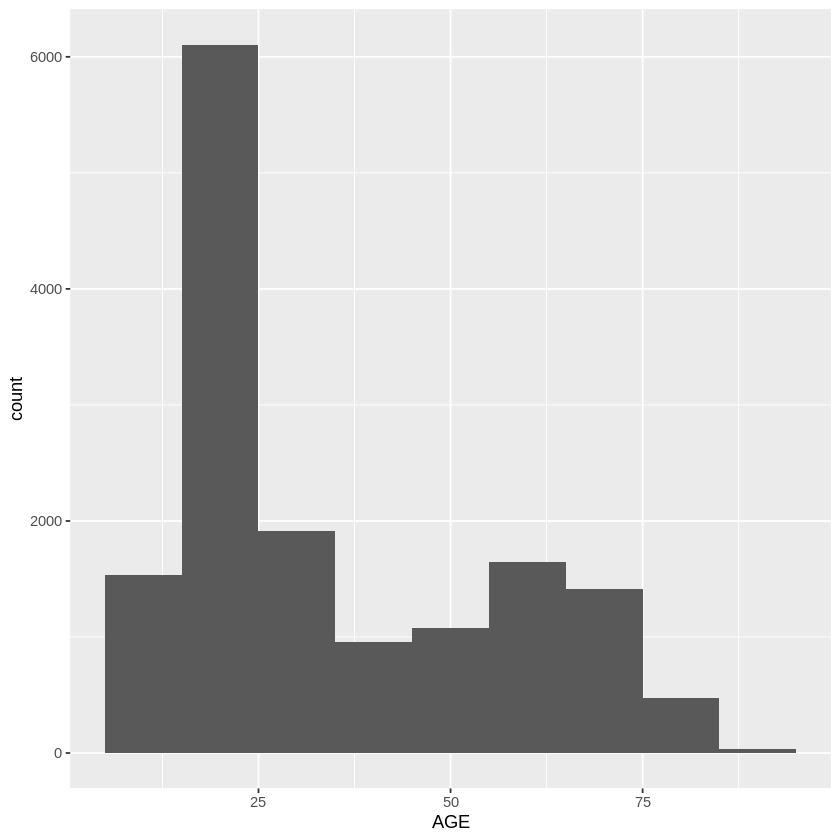

In [ ]:
#AGE: 체력 측정 참가자의 나이
ggplot(DF_HD, aes(AGE))+geom_histogram(binwidth = 10) 
       #히스토그램 구간 수정(10)
       #10대 참가자가 가장 많음을 알 수 있다.

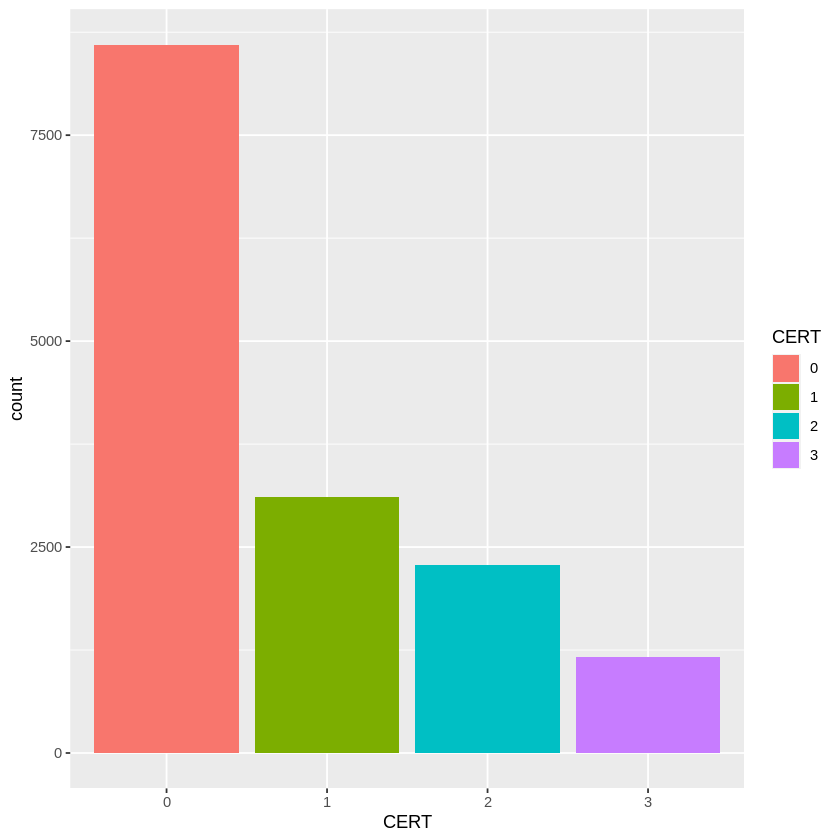

In [ ]:
#CERT: 체력 측정 결과 (0=참가증, 1=3등급, 2=2등급, 3=1등급)
ggplot(DF_HD, aes(CERT, fill=CERT))+geom_bar()
       # 등급을 받지 못하고 참가증만 받은 사람들이 많음. 
       # 체력 증진이 필요해보임. 

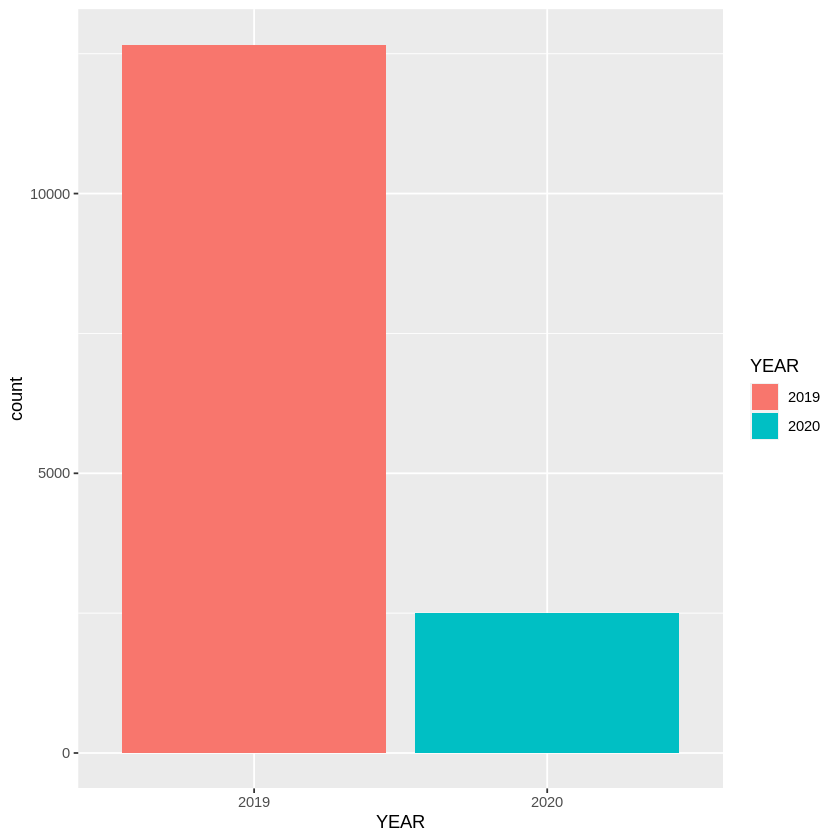

In [ ]:
#YEAR=측정연도
ggplot(DF_HD, aes(YEAR, fill=YEAR))+geom_bar() 
       #코로나 탓인지 2020년도 측정횟수가 현저히 적어짐

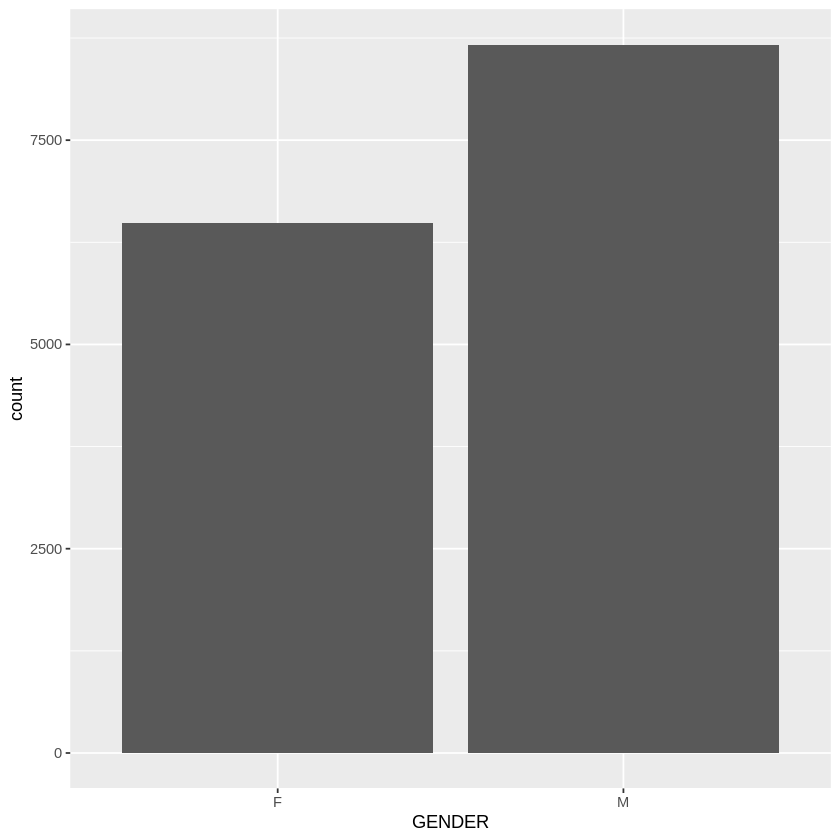

In [ ]:
#GENDER: 체력 측정 참가자의 성별
ggplot(DF_HD, aes(GENDER), fill=GENDER)+geom_bar()
       #남성 참가자가 더 많음

`geom_smooth()` using formula 'y ~ x'



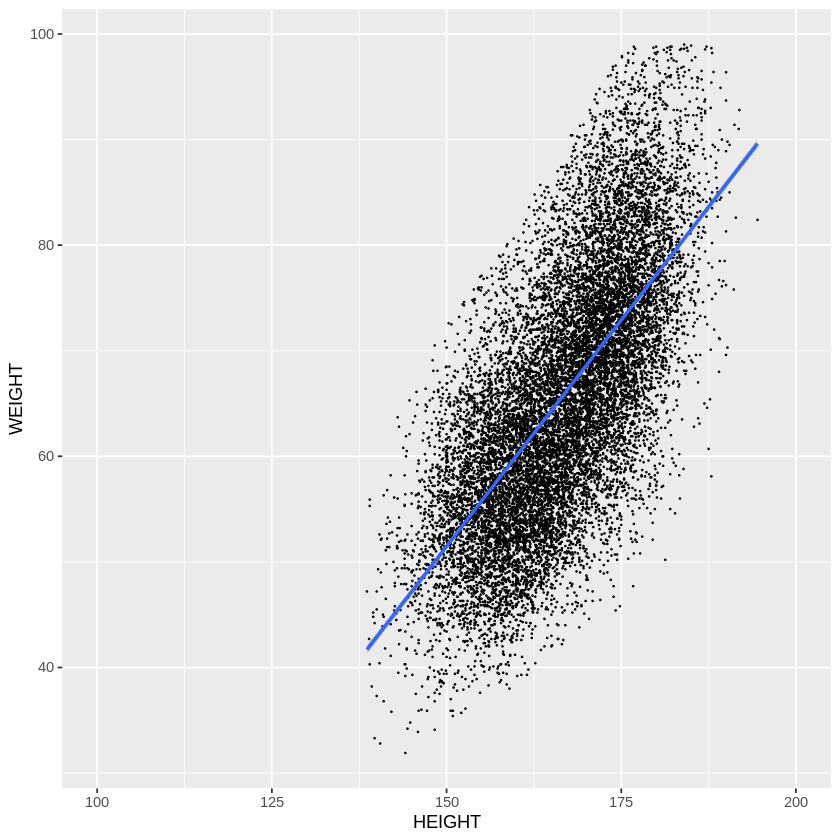

In [ ]:
#HEIGHT: 체력 측정 참가자 키
#WEIGHT: 체력 측정 참가자 몸무게
ggplot(DF_HD, aes(HEIGHT, WEIGHT))+geom_point(size=0.1) +
        geom_smooth(method=lm)+xlim(c(100,200))

[1] 6

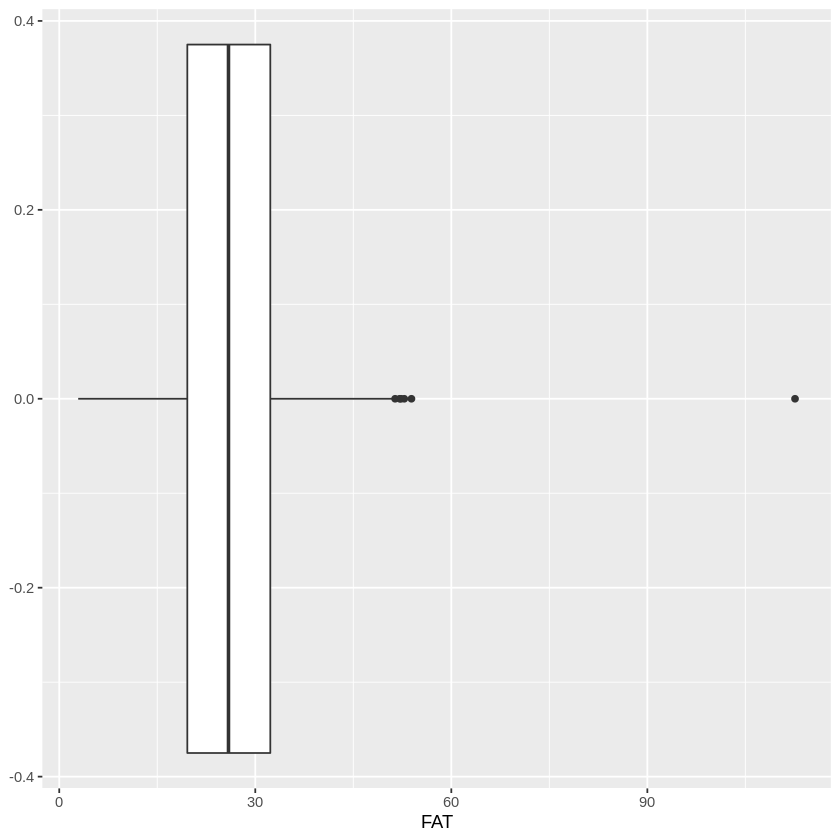

In [ ]:
(6)
#FAT: 체력 측정 참가자 체지방률
ggplot(DF_HD, aes(FAT))+geom_boxplot()

[1] 7

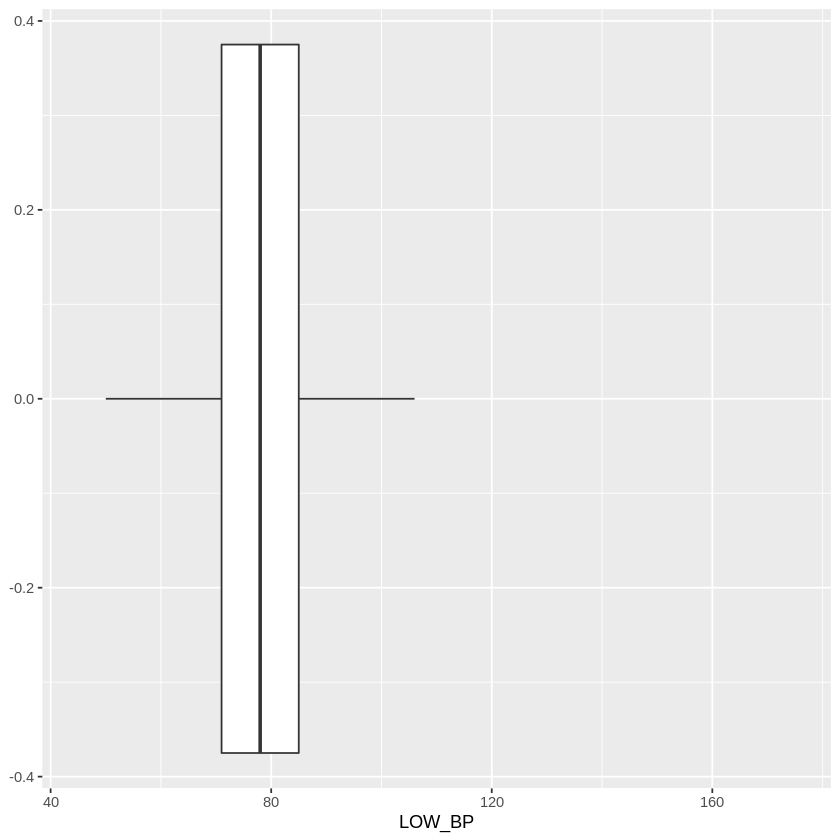

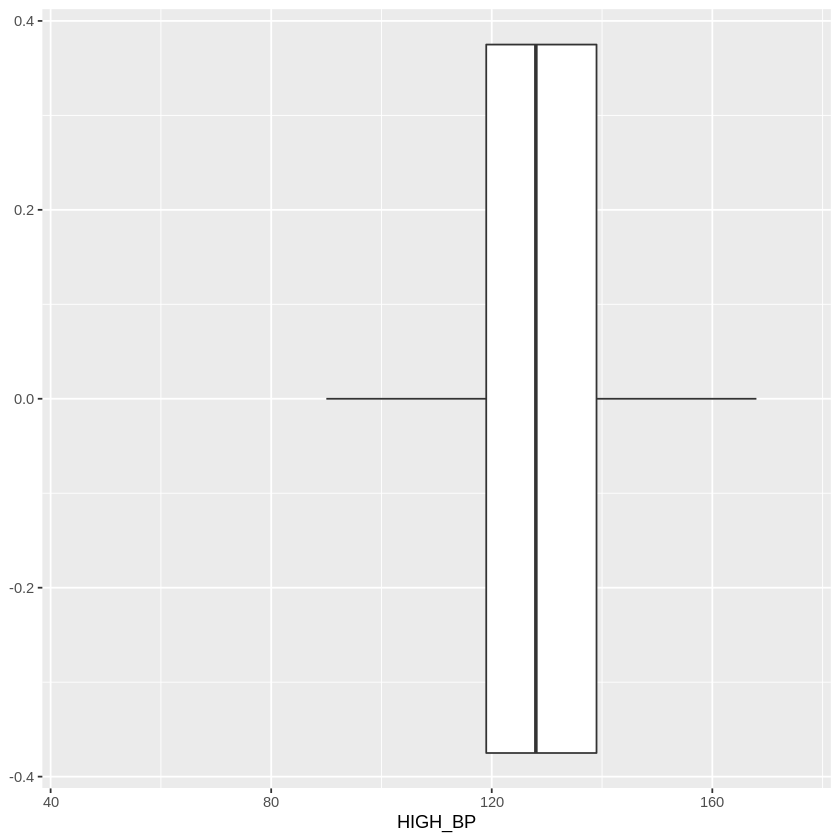

In [ ]:
(7)
#LOW_BP: 체력 측정 참가자 최저혈압
#HIGH_BP: 체력 측정 참가자 최고혈압
ggplot(DF_HD, aes(LOW_BP))+geom_boxplot()+xlim(c(45,175))
ggplot(DF_HD, aes(HIGH_BP))+geom_boxplot()+xlim(c(45,175))

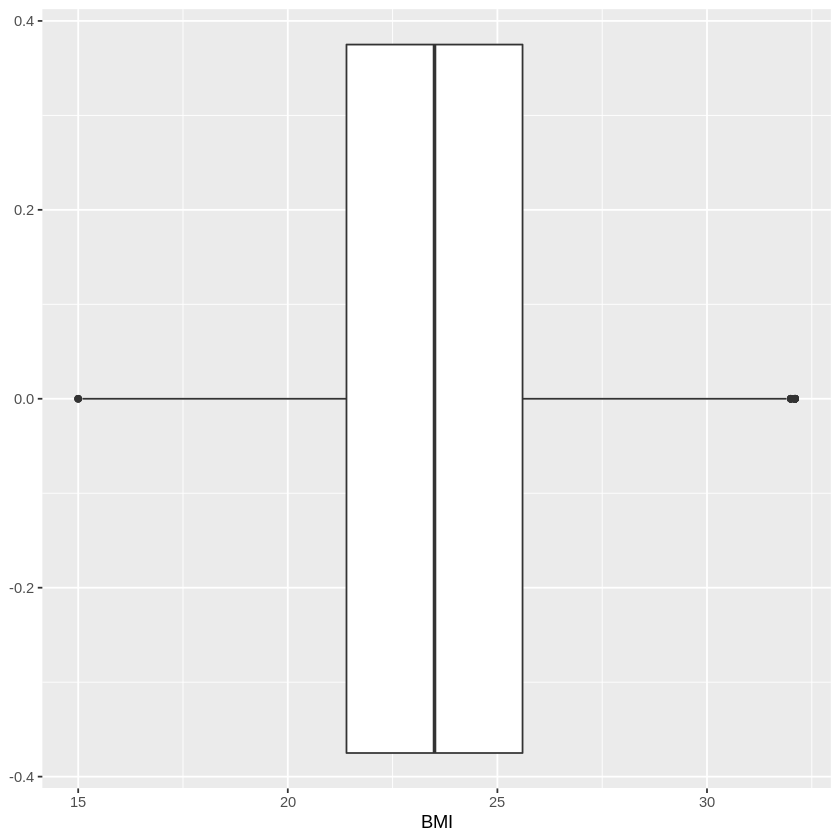

In [ ]:
ggplot(DF_HD, aes(BMI))+geom_boxplot()

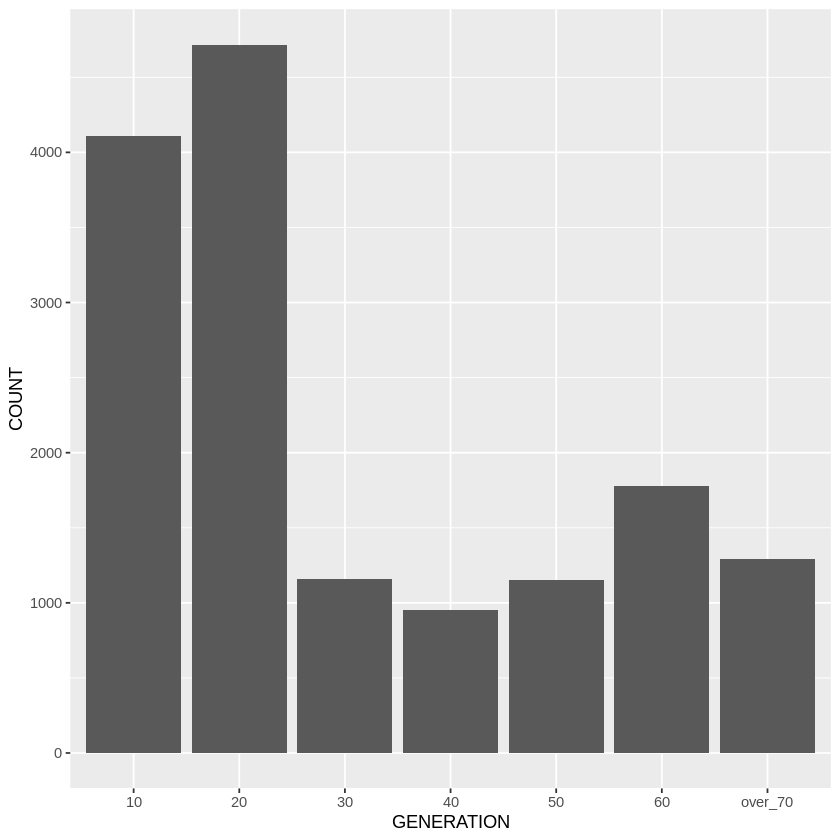

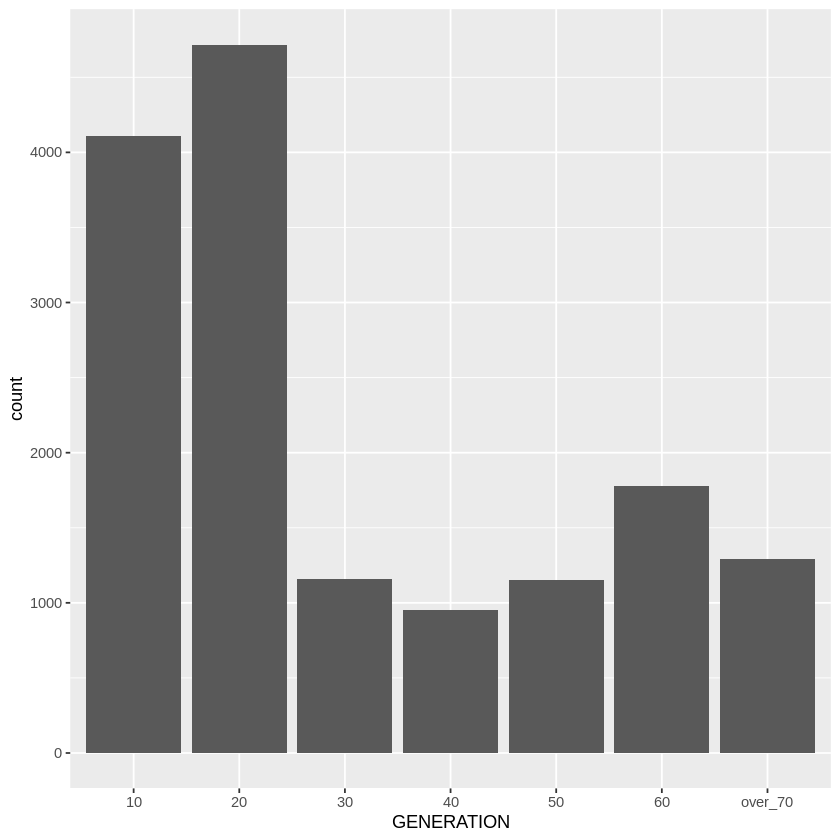

In [ ]:
# 방법 (1): 김종태 방식 
GENERATION_health <- table(DF_HD$GENERATION)
GENERATION_health <- as.data.frame(GENERATION_health)
names(GENERATION_health) <- c("GENERATION","COUNT")
ggplot(GENERATION_health, aes(x = GENERATION, y = COUNT)) + 
       geom_bar(stat='identity')

# 방법 (2): 정의정 방식 
ggplot(DF_HD, aes(GENERATION)) +
       geom_bar(position = 'dodge')

[1] 10

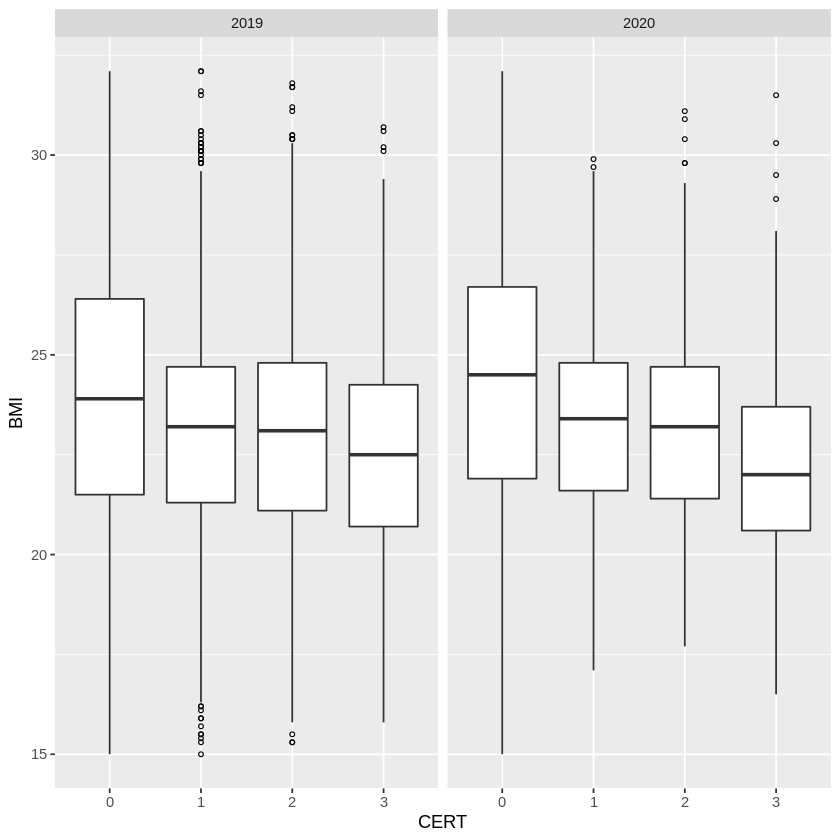

In [ ]:
(10) # 등급 그래프...     
ggplot(DF_HD, aes(x =CERT, y = BMI)) + 
  geom_boxplot(outlier.colour="black", outlier.shape=1,
               outlier.size=1) +
               facet_wrap(~ YEAR,)  
               # 막대그래프도 ㄴㄴ 

[1] 11

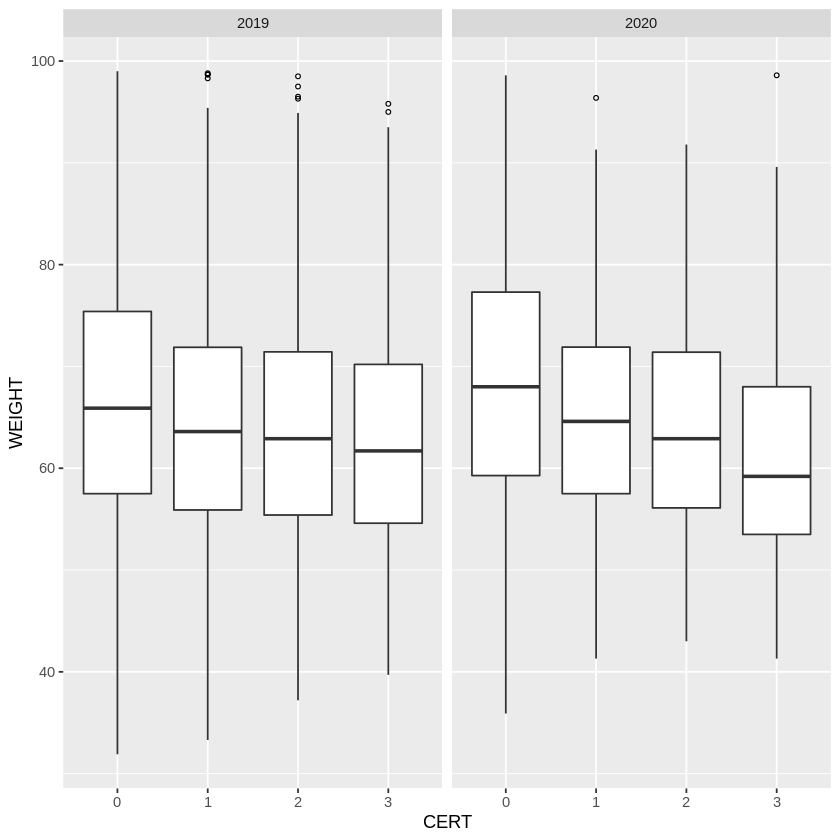

In [ ]:
(11) # 
ggplot(DF_HD, aes(x =CERT, y = WEIGHT)) + 
  geom_boxplot(outlier.colour="black",
               outlier.shape=1,
               outlier.size=1) +
               facet_wrap(~ YEAR,)  \

`geom_smooth()` using formula 'y ~ x'



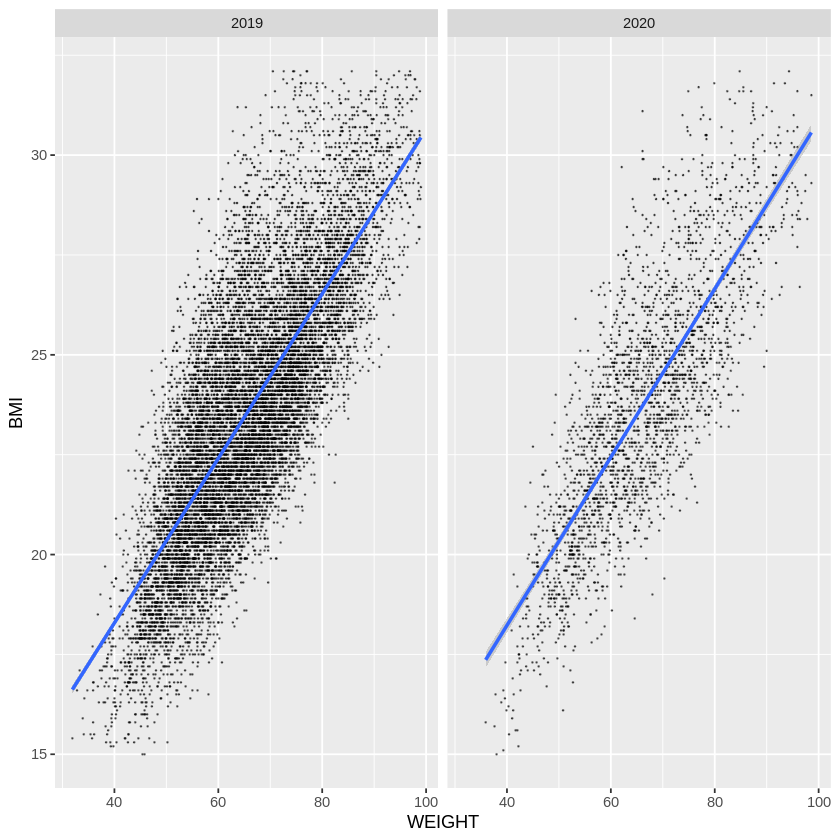

In [ ]:
#성별별 키와 몸무게 그래프
ggplot(DF_HD, aes(x = WEIGHT, y = BMI)) + 
  geom_point(size=0.1, alpha=0.5) +
  geom_smooth(method=lm) +
  facet_wrap(~ YEAR,)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


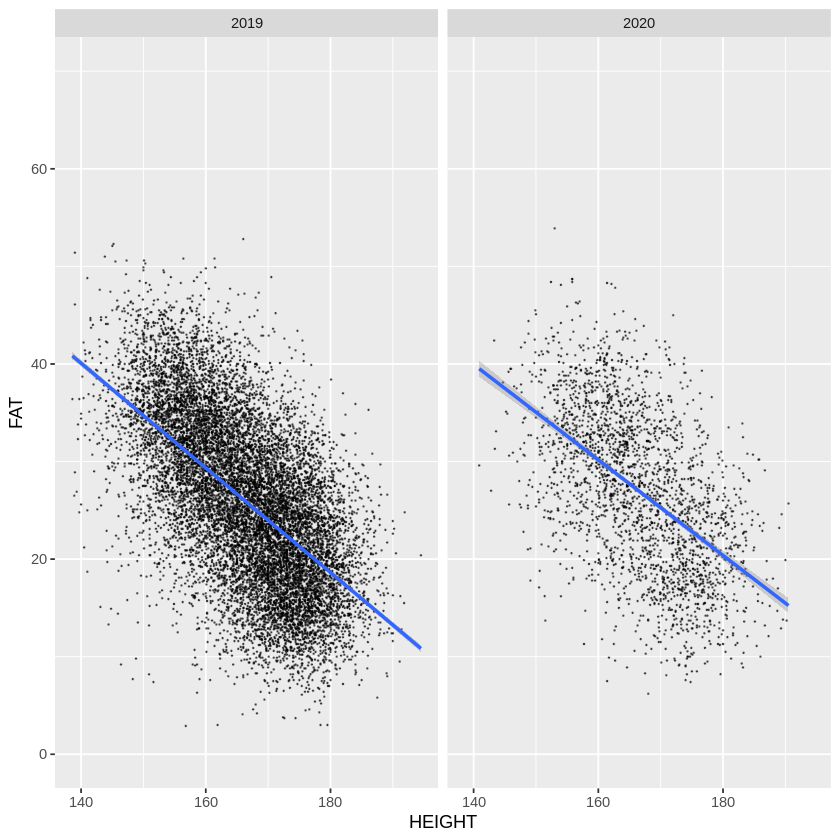

In [ ]:
ggplot(DF_HD, aes(x = HEIGHT, y = FAT)) + 
  geom_point(size=0.1, alpha=0.5) +
  geom_smooth(method=lm) +
  facet_wrap(~ YEAR,) +
  ylim(c(0,70))

## 그래프 2(총 3점)

`geom_smooth()` using formula 'y ~ x'



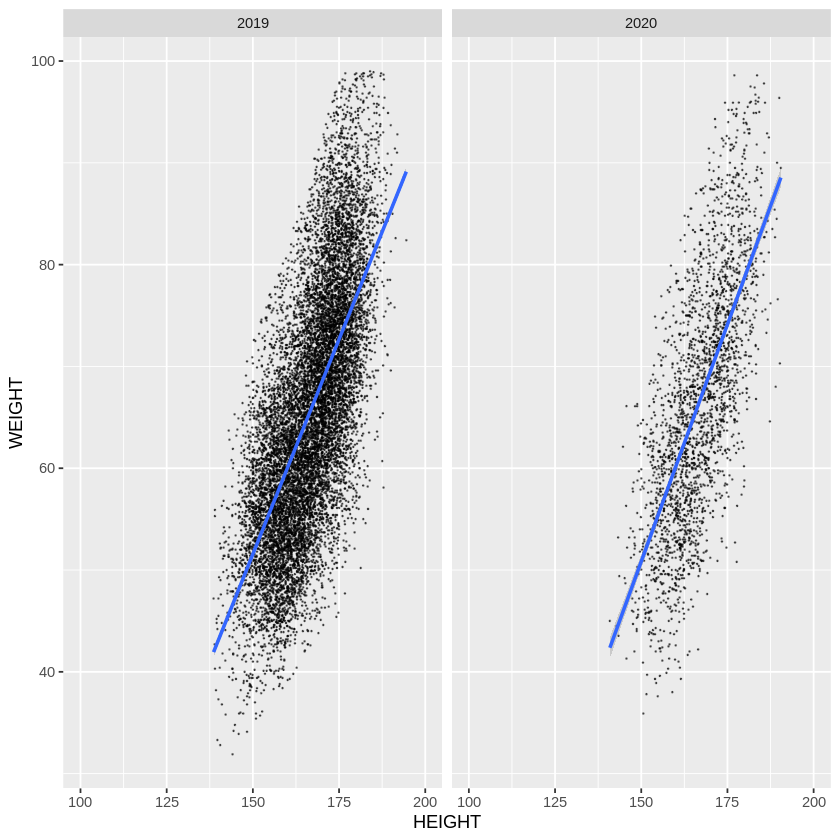

In [ ]:
ggplot(DF_HD, aes(x = HEIGHT, y = WEIGHT)) + 
  geom_point(size=0.1, alpha=0.5) + # 사이즈 # 투명도 조절 가능 
  geom_smooth(method=lm) + 
  facet_wrap(~YEAR,) +
  xlim(c(100,200))

`geom_smooth()` using formula 'y ~ x'



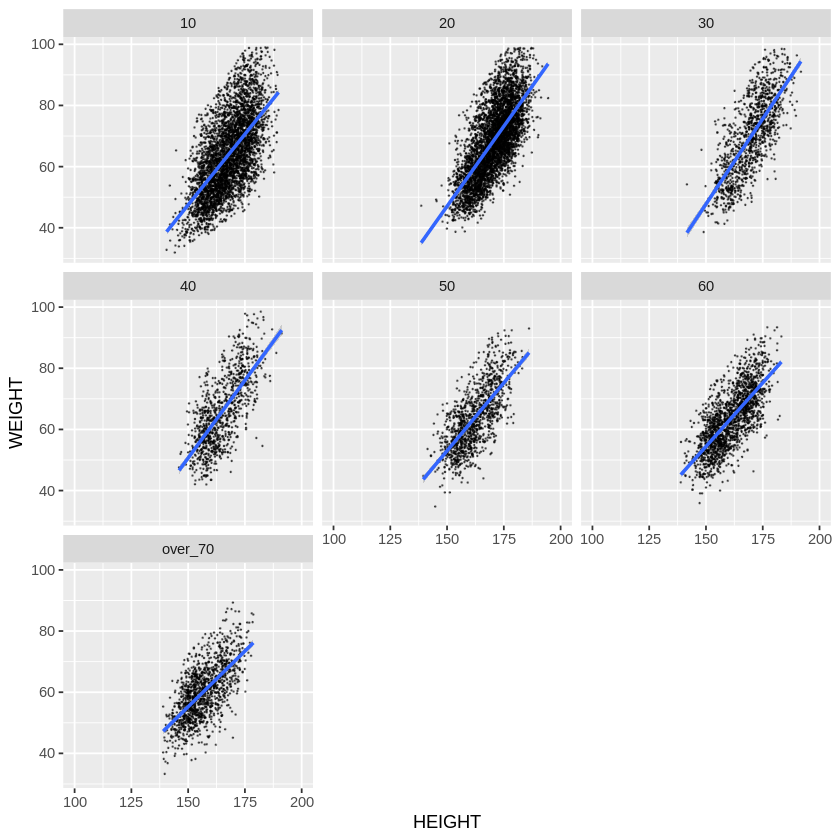

In [ ]:
ggplot(DF_HD, aes(x = HEIGHT, y = WEIGHT)) + 
  geom_point(size=0.1, alpha=0.5) + # 사이즈 # 투명도 조절 가능 
  geom_smooth(method=lm) + 
  facet_wrap(~GENERATION,) +
  xlim(c(100,200))

`geom_smooth()` using formula 'y ~ x'



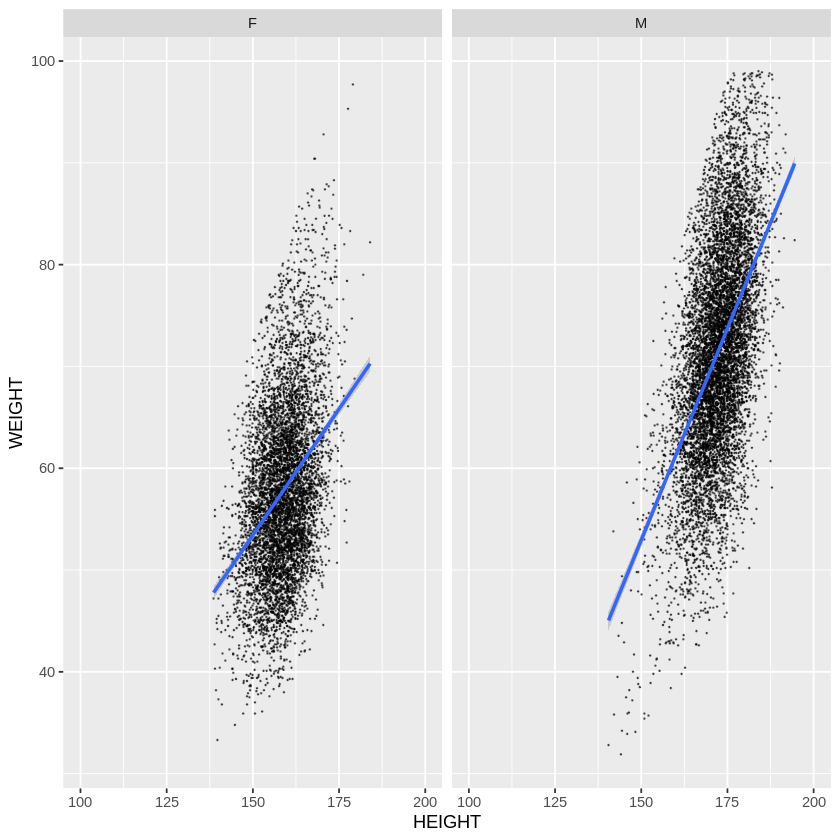

In [ ]:
ggplot(DF_HD, aes(x = HEIGHT, y = WEIGHT)) + 
  geom_point(size=0.1, alpha=0.5) + # 사이즈 # 투명도 조절 가능 
  geom_smooth(method=lm) + 
  facet_wrap(~GENDER,) +
  xlim(c(100,200))

## 그래프 3(총 3점)

기술 통계(년도,세대,성별에 따른 건강 수치)

In [ ]:
# YEAR
DF_HD_YEAR <- DF_HD[,c(3,5:10)]
DF_HD_YEAR <- melt(DF_HD_YEAR) # 열을 행 변수로 다 옮겨버리기~ 
names(DF_HD_YEAR) <- c("YEAR","health_variable","statistics")
head(DF_HD_YEAR,1)  

Using YEAR as id variables



,YEAR,health_variable,statistics
,<fct>,<fct>,<dbl>
1,2019,HEIGHT,170.5


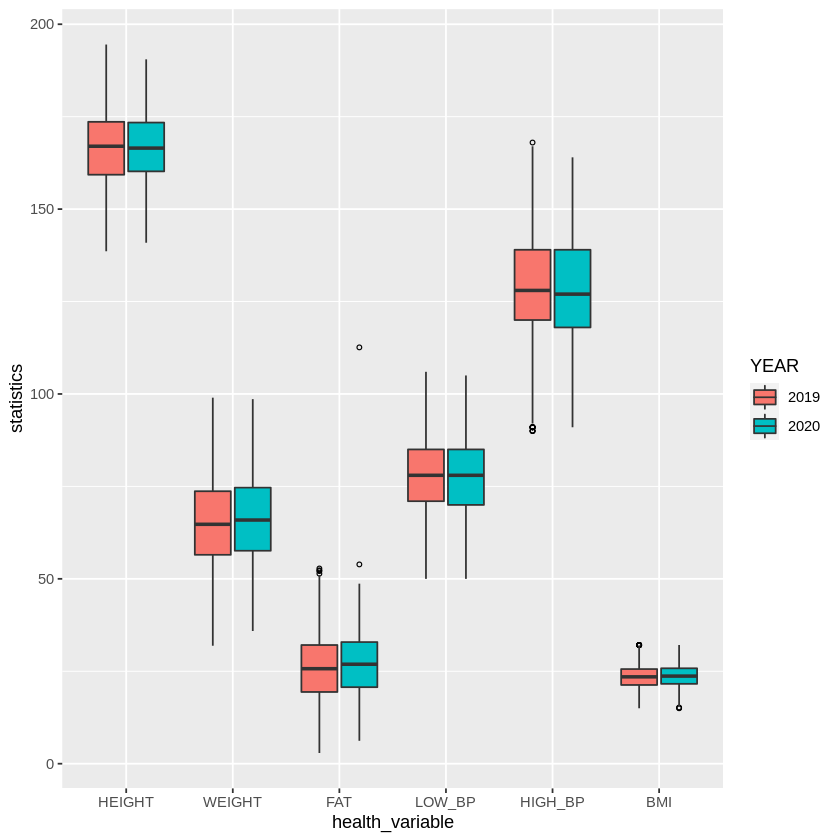

In [ ]:
ggplot(DF_HD_YEAR, aes(x = health_variable, y = statistics, fill = YEAR)) +
       geom_boxplot(outlier.colour="black", outlier.shape=1,
                    outlier.size=1) 

In [ ]:
# GENERATION
DF_HD_GENERATION <- DF_HD[,c(5:11)]
DF_HD_GENERATION <- melt(DF_HD_GENERATION) # 열을 행 변수로 다 옮겨버리기~ 
names(DF_HD_GENERATION) <- c("GENERATION","health_variable","statistics")
head(DF_HD_GENERATION,1) 

Using GENERATION as id variables



,GENERATION,health_variable,statistics
,<fct>,<fct>,<dbl>
1,60,HEIGHT,170.5


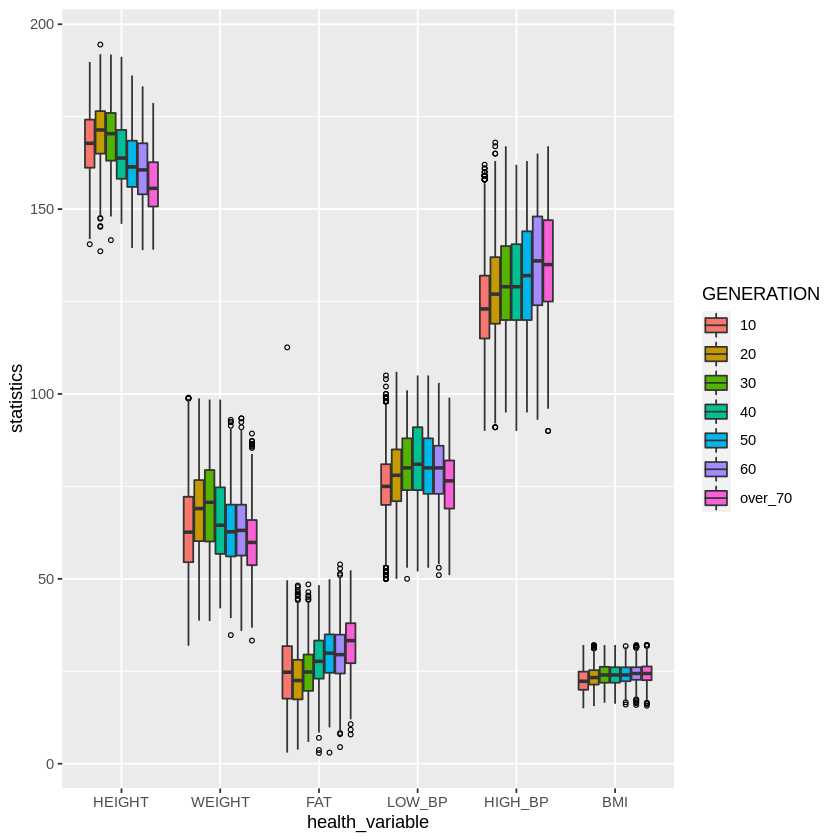

In [ ]:
ggplot(DF_HD_GENERATION, aes(x = health_variable, y = statistics, 
                             fill = GENERATION)) +
        geom_boxplot(outlier.colour="black", outlier.shape=1,
                             outlier.size=1)

In [ ]:
# GENDER
DF_HD_GENDER <- DF_HD[,c(4:10)]
DF_HD_GENDER  <- melt(DF_HD_GENDER) # 열을 행 변수로 다 옮겨버리기~ 
names(DF_HD_GENDER ) <- c("GENDER","health_variable","statistics")
head(DF_HD_GENDER ,1)  

Using GENDER as id variables



,GENDER,health_variable,statistics
,<fct>,<fct>,<dbl>
1,M,HEIGHT,170.5


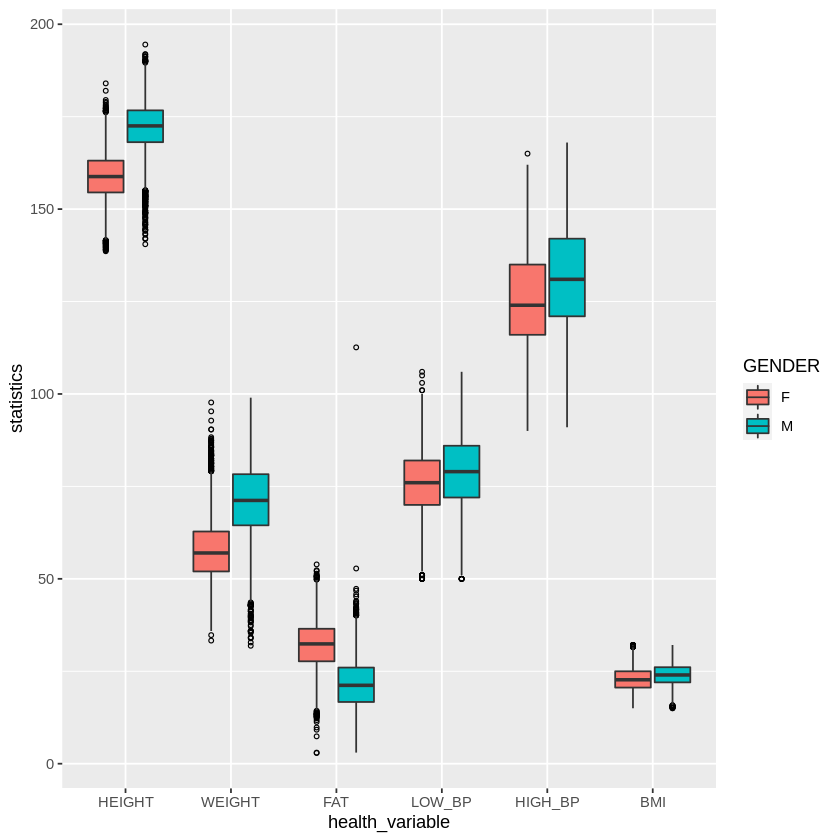

In [ ]:
ggplot(DF_HD_GENDER, aes(x = health_variable, y = statistics, 
                             fill = GENDER)) +
  geom_boxplot(outlier.colour="black", outlier.shape=1,
               outlier.size=1) 

## 그래프 4(총 3점)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



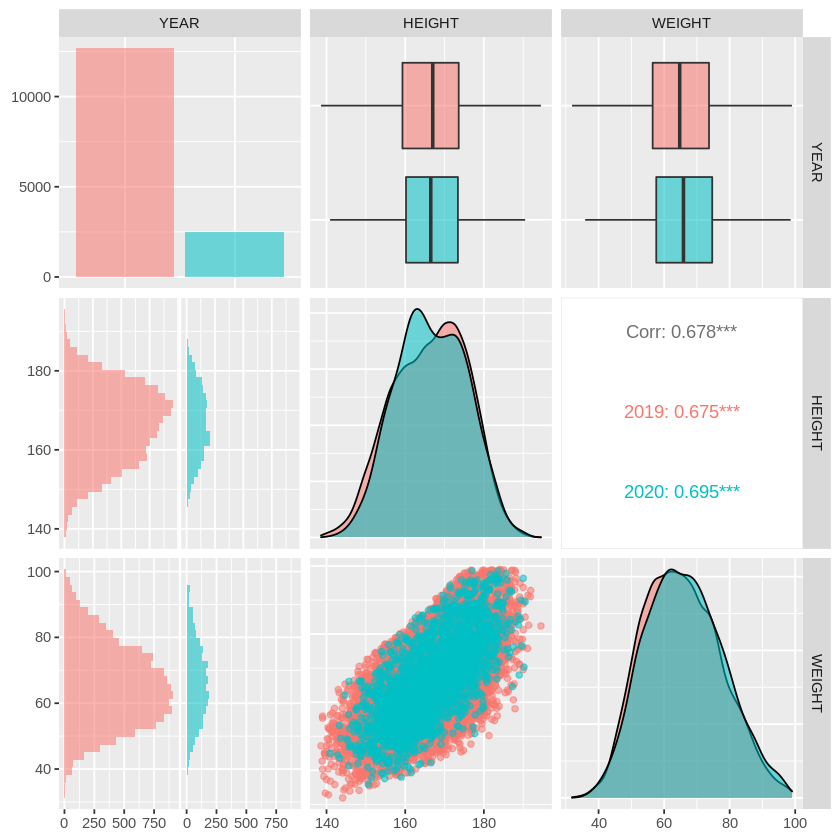

In [ ]:
# (1): YEAR 
DF_HD_martix_YEAR <- DF_HD[,c(3,5,6)]
ggpairs(DF_HD_martix_YEAR, aes(colour = YEAR, alpha = 0.4))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



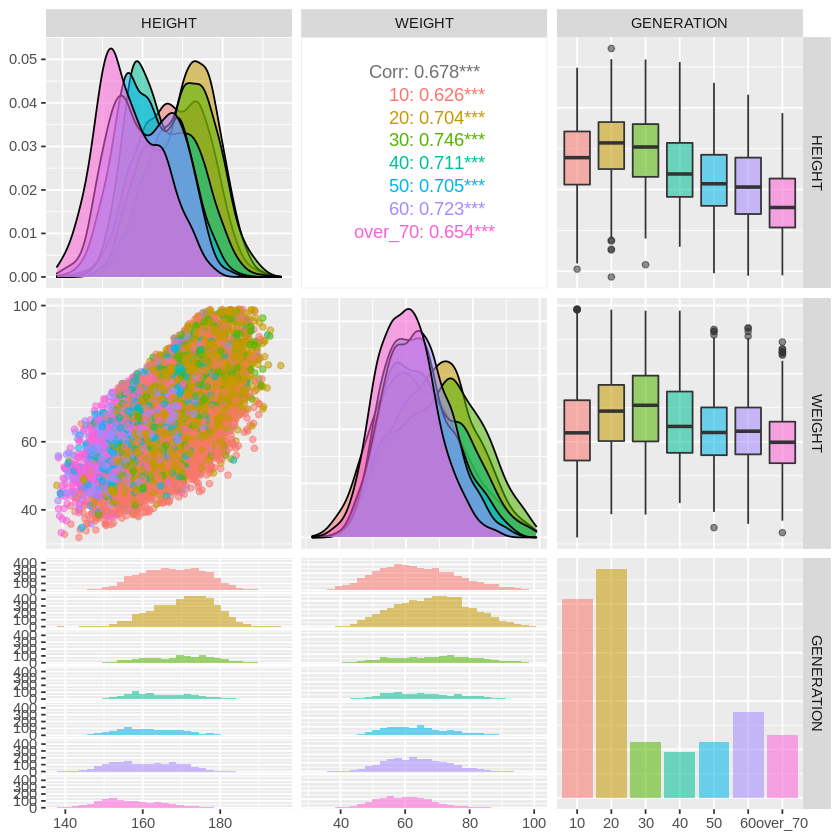

In [ ]:
# (2): GENERATION
DF_HD_martix_GENERATION <- DF_HD[,c(5,6,11)]
ggpairs(DF_HD_martix_GENERATION, aes(colour = GENERATION, alpha = 0.4))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



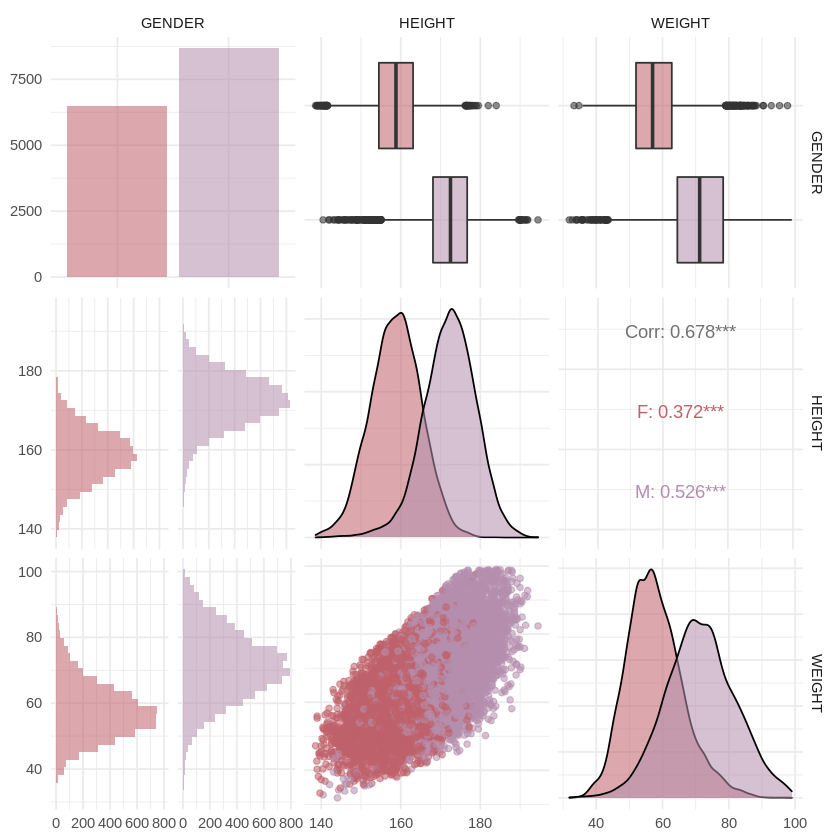

In [ ]:
# (3): GENDER
DF_HD_martix_GENDER <- DF_HD[,c(4:6)]
ggpairs(DF_HD_martix_GENDER , aes(colour = GENDER, alpha = 0.4)) +
  scale_color_nord('aurora') +
  scale_fill_nord('aurora') +
  theme_minimal()

# 4.) 추론통계 

## 연구질문 (1): 상관분석 

- 연구질문 (1) 각 건강 수치 사이에는 상관관계가 있을까?
- **영가설:**각 건강 수치 사이에는 상관관계가 없을 것이다.
- **대립가설:**각 건강 수치 사이에는 상관관계가 있을 것이다.
- 통계분석 설명:상관관계 계수 행렬을 이용해 각 변수별 상관관계 확인

In [ ]:
DF_HD2 <- transform.data.frame(DF_HD,  
                               CERT = as.integer(CERT),  
                               YEAR = as.integer(YEAR)) 

In [ ]:
DF_HD2$GENDER <- ifelse(DF_HD$GENDER == "M", 0, 1) 
          # 남성은 0, 여성은 1로 바꿈 
          # Why? cor()에는 숫자데이터만 가능    

In [ ]:
DF_HD2$GENDER <-  as.integer(DF_HD2$GENDER)
DF_HD_cor <- cor(DF_HD2[,-11]) #GENERATION열 제외

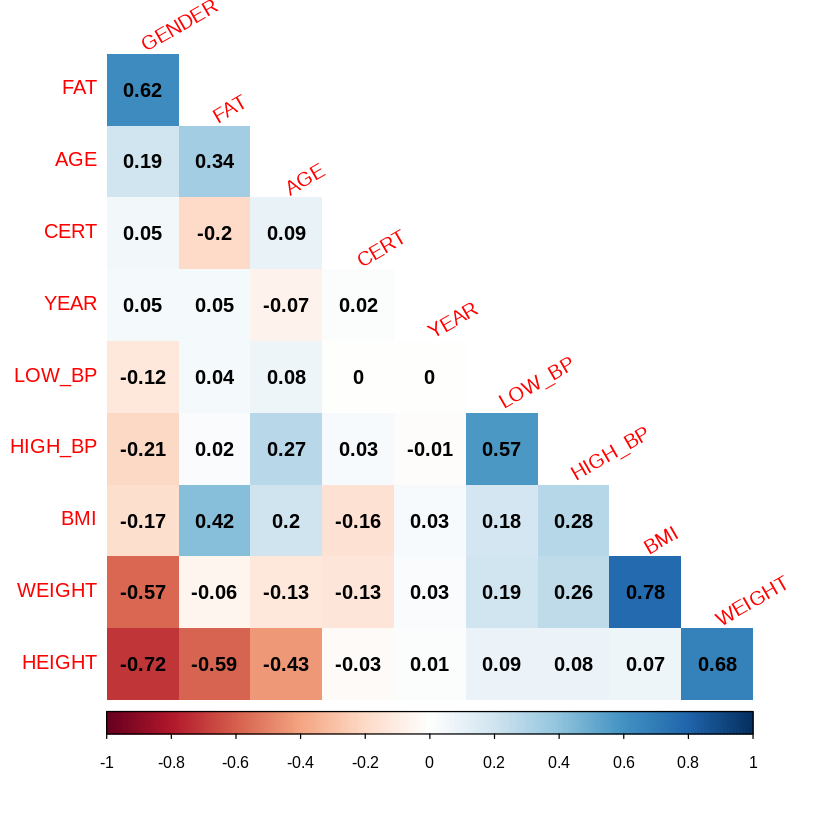

In [ ]:
corrplot(DF_HD_cor, method="shade", addshade="all", 
         shade.col=NA, type = "lower", tl.col="red", 
         tl.srt=30, diag=FALSE, addCoef.col="black", 
         order="FPC")

1. HEIGHT(키)가 증가할수록 WEIGHT(몸무게)가 양의 상관관계
2. HEIGHT가 증가할수록 FAT(체질량지수)은 음의 상관관계
3. WEIGHT가 증가할수록 BMI는 양의 상관관계


## 연구질문 (2): t-test 

- 연구질문 (2) 2019년도 12월(코로나 이전)과 2020년도 12월(코로나 이후)에 건강 수치(FAT)는 달라졌을까?
- 영가설:코로나 이전과 코로나 이후에는 건강 수치가 달라지지 않았을 것이다.
- 대립가설:코로나 이전과 코로나 이후에는 건강 수치가 달라졌을 것이다.
- 통계분석 설명: 연도별 변수 분포가 정규분포인지, 비정규분포인지 확인 후 t-test(), wilcox-test()
등으로 분석한다.
- 또한 등분산을 확인 한 후 Two Sample t-test(), Welch Two Sample t-test()으로 분석한다.

In [ ]:
5000이상 정규성 검정 출처 http://jjy0501.blogspot.com/2017/05/normality-test.html
                        https://m.blog.naver.com/unirone/221464007535
# 데이터의 정규성 검정 (normality test)
# shapiro.test를 쓰면 오류가 남! 
# library(nortest) 패키지를 설치한다. 
# 셈플이 5천이상이면 중심극한정리로 인해 굳이 정규성 검정을 안해도 된다. 그러나 일단 해보자!
# 정규성 검정 결과 p값이 0.05보다 작게 나와도 사실 이걸 고민할 필요는 없다. 

In [ ]:
# 정규성 검정(추론통계)
ad.test(DF_HD$FAT) # 작게 나오지만 넘어가자^^


	Anderson-Darling normality test

data:  DF_HD$FAT
A = 24.493, p-value < 2.2e-16


Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


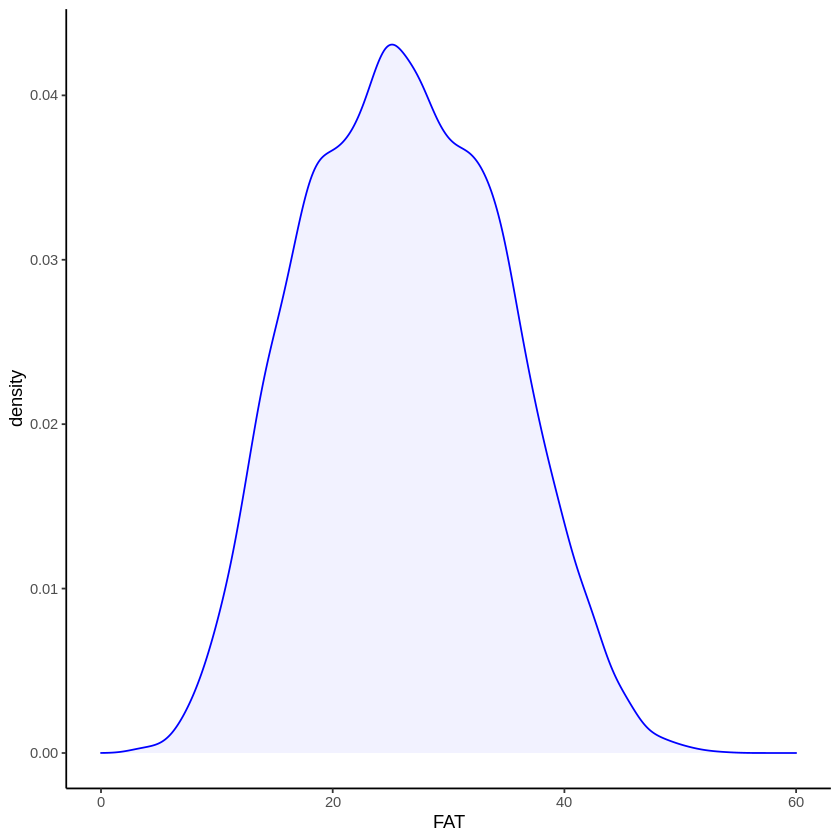

In [ ]:
# 정규성 검정(기술통계) # 그래서 기술통계로 확인해본다. 
DF_HD %>% ggplot(aes(FAT))+
  geom_density(col="blue", 
               fill="blue", alpha=0.05) +
               theme_classic() +
               xlim(c(0,60))

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


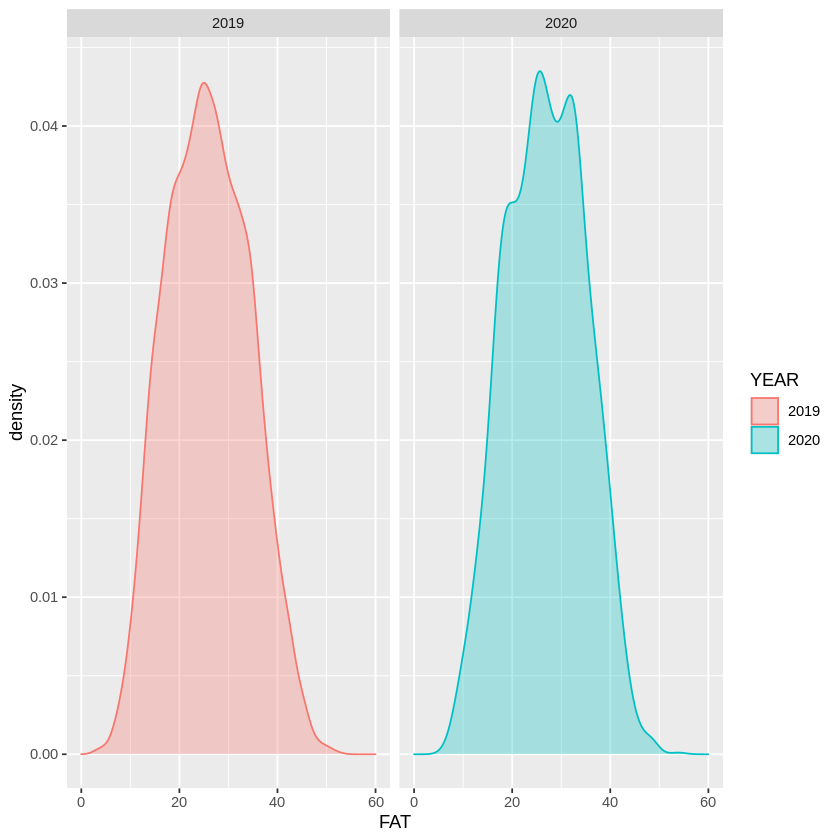

In [ ]:
# 년도별 정규성 검정(기술통계)
ggplot(DF_HD, aes(x = FAT)) +
  geom_density(aes(group = YEAR, colour = YEAR, 
                   fill = YEAR), alpha=0.3) +
  facet_wrap(~ YEAR,) +
  xlim(c(0,60))

In [ ]:
#연도별 FAT 등분산 검정
var.test(DF_HD$FAT ~ DF_HD$YEAR, data=DF_HD) 
# p-vlaue=0.1842 : var.equal = TRUE로 바꿔야함 


	F test to compare two variances

data:  DF_HD$FAT by DF_HD$YEAR
F = 1.0424, num df = 12663, denom df = 2493, p-value = 0.1842
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9803787 1.1070204
sample estimates:
ratio of variances 
          1.042431 


In [ ]:
#t - test(Two Sample t-test)
t.test(DF_HD$FAT ~ DF_HD$YEAR, paired = FALSE, var.equal = TRUE) 
# var.equal = :분산 동일성 여부에 대한 옵션. 
# 위 등분산 검정에서 p-value가 0.1842로 영가설을 채택하게 됨으로, 
# TRUE를 채택. 
#코로나 이후 측정자와 이전 측정자의 평균 FAT 차이는 통계적으로 유의미하지않다.
# (t = -5.5724, p-value  = 2.556e-08 ) # p - value = 0.00


	Two Sample t-test

data:  DF_HD$FAT by DF_HD$YEAR
t = -5.5724, df = 15156, p-value = 2.556e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3874612 -0.6653636
sample estimates:
mean in group 2019 mean in group 2020 
          25.91080           26.93721 


결과해석
- p-value가 0.05 유의수준보다 낮으므로, 영가설을 기각할만한 충분한 증거가 있다. 대립가설을 채택한다. 

결과보고
- 코로나 이후 측정자와 이전 측정자의 FAT는 통계적으로 유의미한 차이가 있다.(t = -5.5724, p-value = 0.00 )

## 연구질문 (3): t-test

- 연구질문 (3) 건강 수치는 세대별로 차이를 보일까?
- 영가설:각 세대별 건강 수치는 차이가 없을 것이다.
- 대립가설:각 세대별 건강 수치는 차이가 있을 것이다.

- 통계분석 설명:연령대별 변수 분포가 정규분포인지, 비정규분포인지 확인 후 -t-test(), wilcox-test()등으로 분석한다.
- 또한 등분산을 확인 한 후 Two Sample t-test(), Welch Two Sample t-test()으로 분석한다.

In [ ]:
# 연구질문(3): t-test 


# 정규성 검정(추론통계)
ad.test(DF_HD$LOW_BP) 
ad.test(DF_HD$HIGH_BP) 


	Anderson-Darling normality test

data:  DF_HD$LOW_BP
A = 15.905, p-value < 2.2e-16



	Anderson-Darling normality test

data:  DF_HD$HIGH_BP
A = 49.737, p-value < 2.2e-16


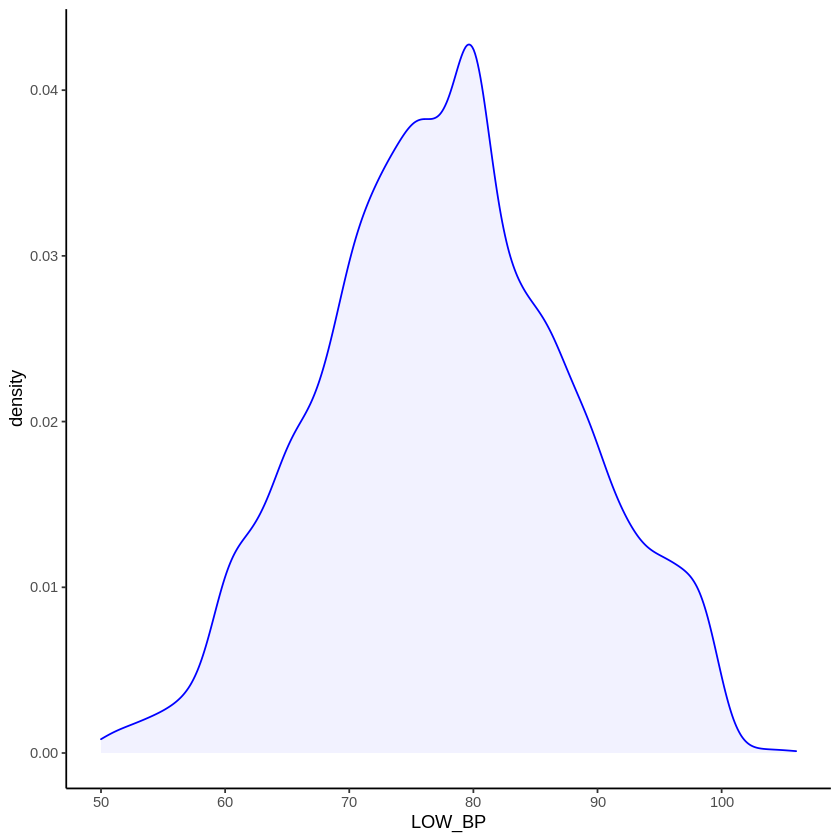

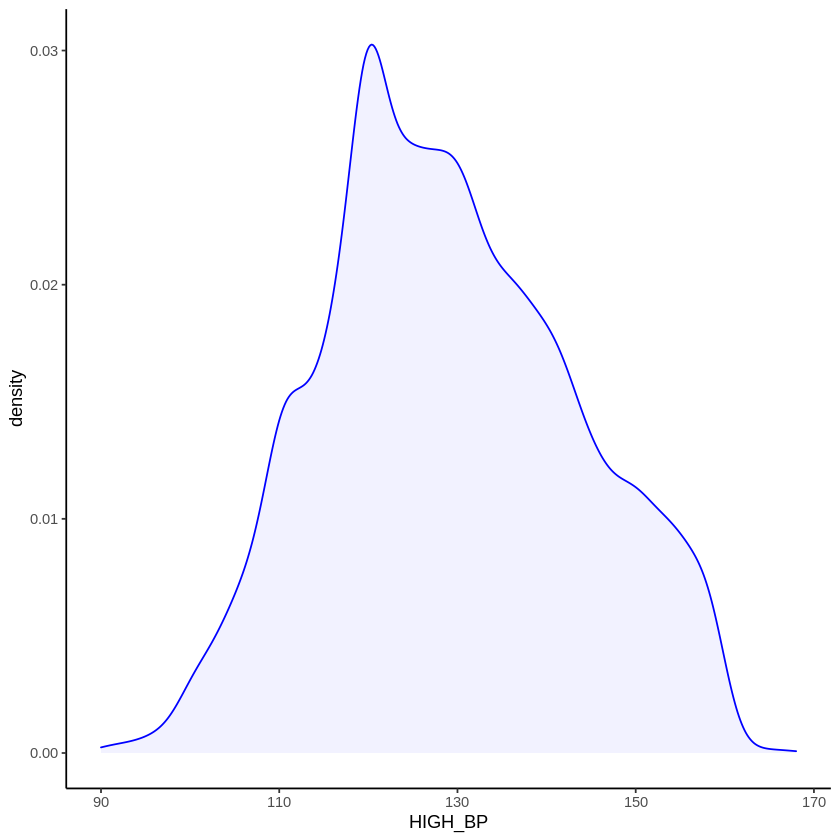

In [ ]:
# 정규성 검정(기술통계)
DF_HD %>% ggplot(aes(LOW_BP))+geom_density(col="blue", 
                                           fill="blue", alpha=0.05)+
                              theme_classic() # 밀도함수 

DF_HD %>% ggplot(aes(HIGH_BP))+geom_density(col="blue", 
                                            fill="blue", alpha=0.05)+
                              theme_classic() # 밀도함수 

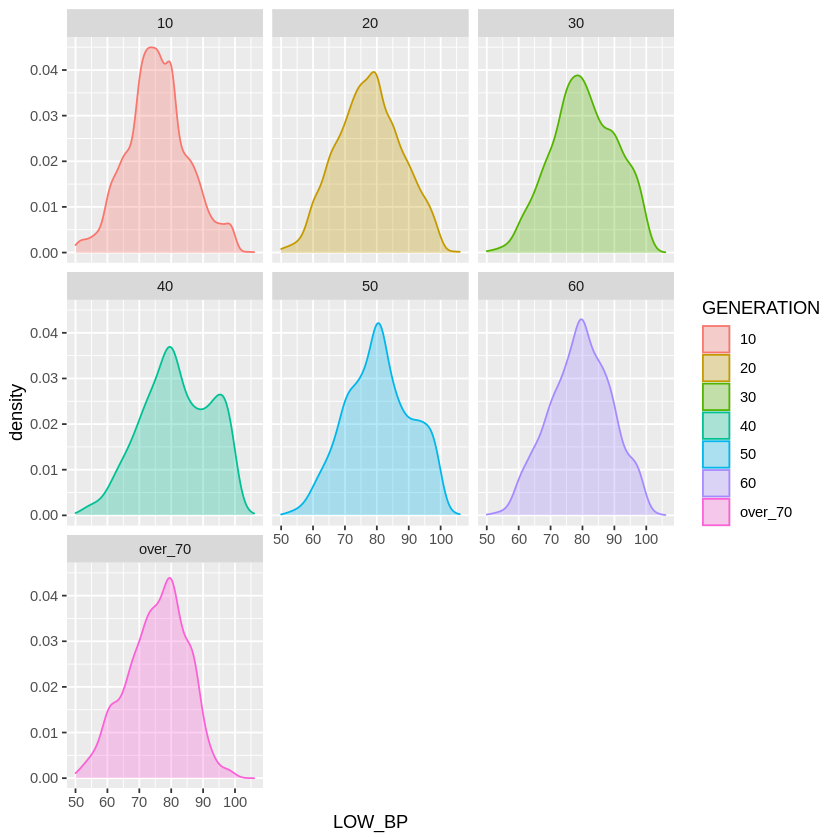

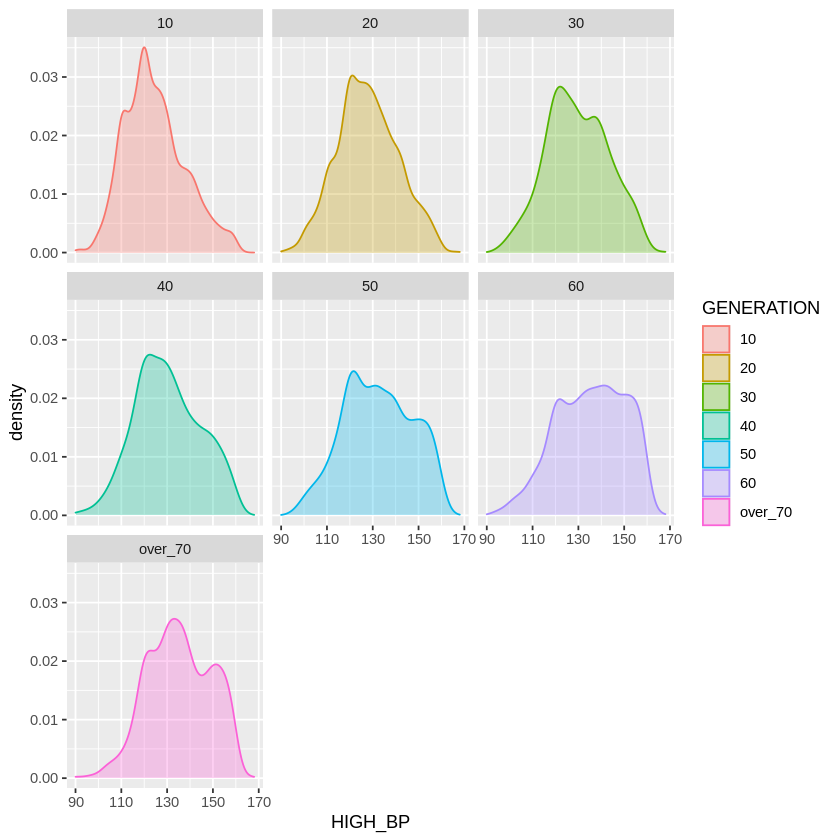

In [ ]:
# 세대별 정규성 검정(기술통계)
ggplot(DF_HD, aes(x = LOW_BP)) +
  geom_density(aes(group = GENERATION, colour =  GENERATION, fill =  GENERATION), 
               alpha=0.3) +
  facet_wrap(~  GENERATION,)

ggplot(DF_HD, aes(x = HIGH_BP)) +
  geom_density(aes(group = GENERATION, colour =  GENERATION, fill =  GENERATION), 
               alpha=0.3) +
  facet_wrap(~  GENERATION,)

In [ ]:
# grouping factor must have exactly 2 levels: 2그룹만 가능 


DF_HD_10_20_30_40 <- DF_HD %>% filter(GENERATION == '10' | GENERATION == '20' | 
                                      GENERATION == '30' | GENERATION == '40')
DF_HD_30_40_50_60 <- DF_HD %>% filter(GENERATION == '30' | GENERATION == '40' |
                                      GENERATION == '50' | GENERATION == '60')

In [ ]:
DF_HD_10_20_30_40$GENERATION_UNION <- ifelse(DF_HD_10_20_30_40$GENERATION == "10",
                                             "AGE10_20",
                                      ifelse(DF_HD_10_20_30_40$GENERATION ==  "20",
                                             "AGE10_20",
                                      ifelse(DF_HD_10_20_30_40$GENERATION ==  "30",
                                             "AGE30_40","AGE30_40")))


DF_HD_30_40_50_60$GENERATION_UNION <- ifelse(DF_HD_30_40_50_60$GENERATION == "30",
                                             "AGE30_40",
                                      ifelse(DF_HD_30_40_50_60$GENERATION == "40",
                                             "AGE30_40",
                                      ifelse(DF_HD_30_40_50_60$GENERATION == "50",
                                             "AGE50_60","AGE50_60")))

In [ ]:

table(DF_HD_10_20_30_40$GENERATION_UNION)
table(DF_HD_10_20_30_40$GENERATION)
table(DF_HD_30_40_50_60$GENERATION_UNION)
table(DF_HD_30_40_50_60$GENERATION) # 더블체크 완료! 
#4110(10대) + 4718(20대) = 8828(AGE10_20) 
#1160(30대) + 951(40대) = 2111(AGE30_40)


AGE10_20 AGE30_40 
    8828     2111 


     10      20      30      40      50      60 over_70 
   4110    4718    1160     951       0       0       0 


AGE30_40 AGE50_60 
    2111     2929 


     10      20      30      40      50      60 over_70 
      0       0    1160     951    1150    1779       0 

In [ ]:
# 세대별 등분산 검정 
var.test(DF_HD_10_20_30_40$HIGH_BP ~ DF_HD_10_20_30_40$GENERATION_UNION, 
         data=DF_HD_10_20_30_40) 
# 0.007867 < 0.05 var.equal = FALSE
var.test(DF_HD_10_20_30_40$LOW_BP ~ DF_HD_10_20_30_40$GENERATION_UNION, 
         data=DF_HD_10_20_30_40) 
# 0.001152 < 0.05 var.equal = FALSE


	F test to compare two variances

data:  DF_HD_10_20_30_40$HIGH_BP by DF_HD_10_20_30_40$GENERATION_UNION
F = 0.91392, num df = 8827, denom df = 2110, p-value = 0.007867
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8539328 0.9767373
sample estimates:
ratio of variances 
          0.913915 



	F test to compare two variances

data:  DF_HD_10_20_30_40$LOW_BP by DF_HD_10_20_30_40$GENERATION_UNION
F = 0.8959, num df = 8827, denom df = 2110, p-value = 0.001152
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8371006 0.9574844
sample estimates:
ratio of variances 
         0.8959004 


In [ ]:
var.test(DF_HD_30_40_50_60$HIGH_BP ~ DF_HD_30_40_50_60$GENERATION_UNION, 
         data=DF_HD_30_40_50_60) # var.equal = FALSE

var.test(DF_HD_30_40_50_60$LOW_BP ~ DF_HD_30_40_50_60$GENERATION_UNION, 
         data=DF_HD_10_20_30_40) # var.equal = FALSE


	F test to compare two variances

data:  DF_HD_30_40_50_60$HIGH_BP by DF_HD_30_40_50_60$GENERATION_UNION
F = 0.84824, num df = 2110, denom df = 2928, p-value = 5.06e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7838719 0.9183590
sample estimates:
ratio of variances 
         0.8482362 



	F test to compare two variances

data:  DF_HD_30_40_50_60$LOW_BP by DF_HD_30_40_50_60$GENERATION_UNION
F = 1.1272, num df = 2110, denom df = 2928, p-value = 0.002924
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.041673 1.220390
sample estimates:
ratio of variances 
          1.127205 


In [ ]:
#t - test(Two Sample t-test)
t.test(DF_HD_10_20_30_40$HIGH_BP ~ DF_HD_10_20_30_40$GENERATION_UNION, 
       paired = FALSE, var.equal = FALSE) # 세대 최고혈압(20,30 vs 40,50)
t.test(DF_HD_30_40_50_60$HIGH_BP~ DF_HD_30_40_50_60$GENERATION_UNION, 
       paired = FALSE, var.equal = FALSE) # 세대 최고혈압(30,40 vs 50,60)

#var.equal = :분산 동일성 여부에 대한 옵션. 위 등분산 검정에서 p-value가 각각 0.007138, 0.0007053로 대립가설을 채택하게 되므로, FALSE를 채택. 


	Welch Two Sample t-test

data:  DF_HD_10_20_30_40$HIGH_BP by DF_HD_10_20_30_40$GENERATION_UNION
t = -10.926, df = 3097.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.269213 -2.970104
sample estimates:
mean in group AGE10_20 mean in group AGE30_40 
              126.2719               129.8915 



	Welch Two Sample t-test

data:  DF_HD_30_40_50_60$HIGH_BP by DF_HD_30_40_50_60$GENERATION_UNION
t = -10.63, df = 4748.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.138732 -3.538384
sample estimates:
mean in group AGE30_40 mean in group AGE50_60 
              129.8915               134.2301 


In [ ]:
t.test(DF_HD_10_20_30_40$LOW_BP ~ DF_HD_10_20_30_40$GENERATION_UNION, 
       paired = FALSE, var.equal = FALSE) # 세대 최저혈압(10,20 vs 30,40)
t.test(DF_HD_30_40_50_60$LOW_BP~ DF_HD_30_40_50_60$GENERATION_UNION, 
       paired = FALSE, var.equal = FALSE) # 세대 최저혈압(30,40 vs 50,60)


	Welch Two Sample t-test

data:  DF_HD_10_20_30_40$LOW_BP by DF_HD_10_20_30_40$GENERATION_UNION
t = -17.11, df = 3077.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.741946 -3.766884
sample estimates:
mean in group AGE10_20 mean in group AGE30_40 
              76.71063               80.96504 



	Welch Two Sample t-test

data:  DF_HD_30_40_50_60$LOW_BP by DF_HD_30_40_50_60$GENERATION_UNION
t = 3.9577, df = 4380.4, p-value = 7.686e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5770387 1.7098872
sample estimates:
mean in group AGE30_40 mean in group AGE50_60 
              80.96504               79.82158 


결과해석
- 모든 세대별 p-value가 0.05 유의수준보다 낮으므로, 영가설을 기각할만한 충분한 증거가 있다. 대립가설을 채택한다. 

결과보고
- 세대별(10,20대 & 30,40대) 최고혈압은 통계적으로 유의미한 차이가 있다. (t = -10.926 p-value < 0.00)
- 세대별(30,40대 & 50,60대) 최고혈압은 통계적으로 유의미한 차이가 있다. (t = -10.63, p-value < 0.00)
- 세대별(10,20대 & 30,40대) 최저혈압은 통계적으로 유의미한 차이가 있다. (t = -17.11, p-value < 0.00) 
- 세대별(30,40대 & 50,60대) 최저혈압은 통계적으로 유의미한 차이가 있다. (t = 3.9577 p-value = 0.00)  

- 최고혈압: 50,60대 집단의 평균이 가장 큼(말년 건강 조심!!) 
- 최저혈압: 30,40대 집단의 평균이 가장 큼 




## 연구질문 (4):t-test

- 연구질문 (4) 2020년 12월(코로나 이후)의 건강 수치는 성별별로 차이를 보일까?
- 대립가설:성별별 건강 수치는 차이가 있을 것이다. 
- 영가설:성별별 건강 수치는 차이가 없을 것이다. 
- 통계분석 설명:성별별 변수 분포가 정규분포인지,- 비정규분포인지 확인 후 t-test(), wilcox-test()등으로 분석한다.
- 또한 등분산을 확인 한 후 Two Sample t-test(), Welch Two Sample t-test()으로 분석한다.

In [ ]:
# 연구질문(4): t-test 

# 정규성 검정(추론통계)
ad.test(DF_HD$BMI)


	Anderson-Darling normality test

data:  DF_HD$BMI
A = 8.0615, p-value < 2.2e-16


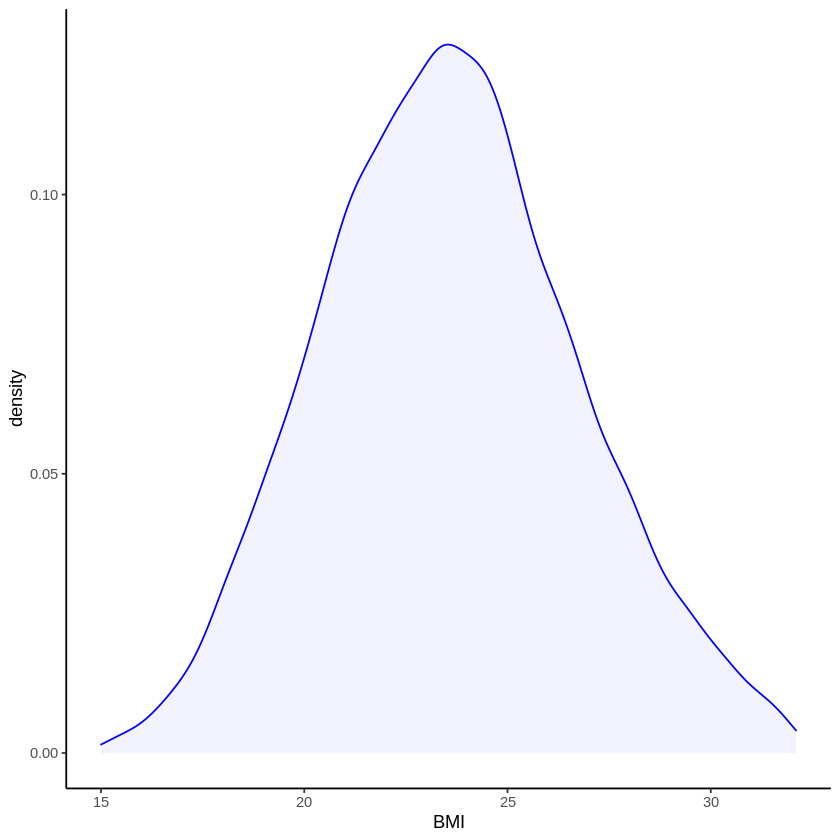

In [ ]:
# 정규성 검정(기술통계)
DF_HD %>% ggplot(aes(BMI))+geom_density(col="blue", 
                                        fill="blue",
                                        alpha=0.05)+theme_classic() # 밀도함수

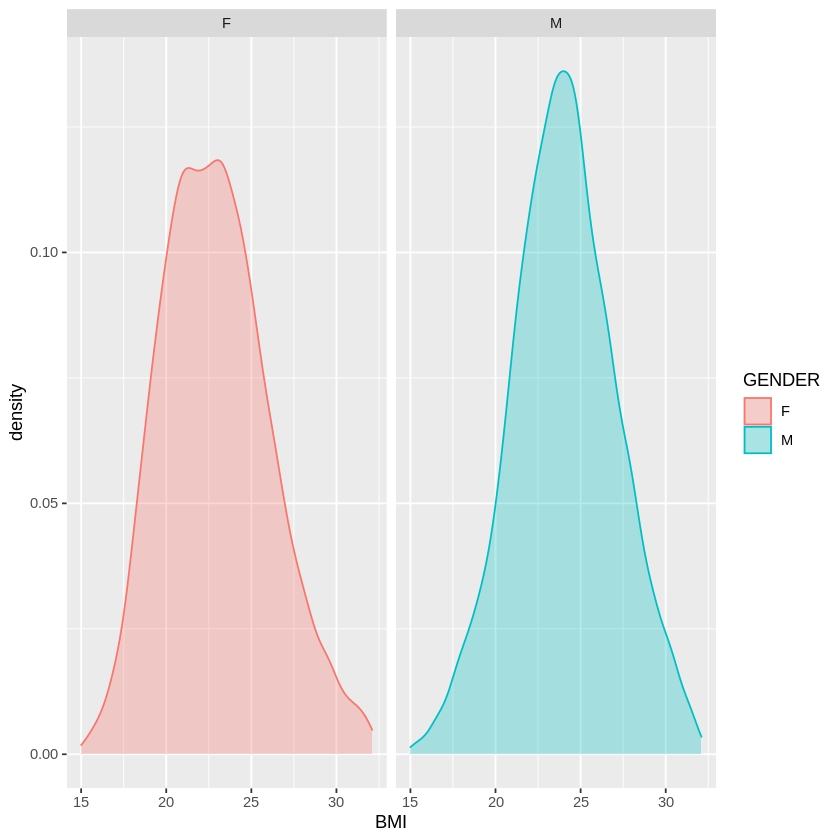

In [ ]:
# 성별별 정규성 검정(기술통계)
ggplot(DF_HD, aes(x = BMI)) +
  geom_density(aes(group = GENDER, colour =  GENDER, fill =  GENDER), alpha=0.3) +
  facet_wrap(~  GENDER,)

In [ ]:
#성별별 BMI 등분산 검정
var.test(DF_HD$BMI ~ DF_HD$GENDER, data=DF_HD) 
# 8.919e-05: var.equal = FALSE


	F test to compare two variances

data:  DF_HD$BMI by DF_HD$GENDER
F = 1.095, num df = 6487, denom df = 8669, p-value = 8.919e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.046375 1.146079
sample estimates:
ratio of variances 
           1.09501 


In [ ]:
t.test(DF_HD$BMI ~ DF_HD$GENDER, paired = FALSE, var.equal = FALSE)
# var.equal = :분산 동일성 여부에 대한 옵션. 
# 위 등분산 검정에서 p-value가 8.919e-05로 대립가설을 채택하게 되므로, 
# FALSE를 채택. 
# 코로나 이후 성별별 BMI 차이는 통계적으로 유의한 차이가 있다. 
# (t = -21.669, p-value < 2.2e-16)


	Welch Two Sample t-test

data:  DF_HD$BMI by DF_HD$GENDER
t = -21.669, df = 13622, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.204121 -1.004350
sample estimates:
mean in group F mean in group M 
       22.93335        24.03759 


결과해석
- p-value가 0.05 유의수준보다 낮으므로, 영가설을 기각할만한 충분한 증거가 있다. 대립가설을 채택한다. 

결과보고
- 성별별로 BMI는 통계적으로 유의미한 차이가 있다.(t = -21.669, p-value < 0.00)
- 남자 평균이 더 크다 

In [ ]:
options("scipen"= 999) # e숫자 형태 표시 (문과를 위한 코드)
2.2e-16 # 작다! 

[1] 0.00000000000000022

In [ ]:
#png(filename="corrplot.png",width=1000,height=1000,unit="px",bg="transparent")
#corrplot <- corrplot(DF_HD_cor, method="shade", addshade="all", shade.col=NA, type = "lower", tl.col="red", tl.srt=30, diag=FALSE, addCoef.col="black", order="FPC")
#dev.off()

#png(filename="FAT01.png",width=600,height=600,unit="px",bg="transparent")
#DF_HD %>% ggplot(aes(FAT))+geom_density(col="blue", fill="blue", alpha=0.05)+theme_classic() # 밀도함수 
#dev.off()

# 이미지 파일 화질 좋게 하는 방법 크기 조절

[1] 3.132002